# Phase 5 Project Submission
* Student Name: Alec Schonfeld
* Student pace: self paced
* Instructor name: Mark

---

# Busness Understanding

This project analyzes the price history of 20 major cryptocurrency assets to provide institutional clients with actionable insights for developing a data-driven investment thesis. By uncovering trends, correlations, and key price drivers, the analysis aims to support informed trading strategies tailored to the unique dynamics of the crypto market. This comprehensive approach enables institutional stakeholders to optimize portfolio allocation, manage risk effectively, and identify high-value opportunities in a rapidly evolving asset class.

---

# Data Understanding 

- The dataset is from Kaggle and has data from  2010-07-17 till 2024-12-09.
- There are individual CSV files for each asset with data on the ticket, date, price at open, price at close, low, and high
- This data enables us to conduct thoroguh time-series analysis of each of the 20 assets we will be evaluating
- The tickets we chose are based on market cap, volume, and popularity amongst the industry

---

# Data Preparation

In [1]:
pip install pandas-ta


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_ta as ta

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import RandomizedSearchCV
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore", category=FutureWarning)



%matplotlib inline

plt.style.use('seaborn-v0_8-darkgrid')

In [64]:
# Load and import datasets

folder_path = 'price_data'  # Replace with your folder path
all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

dataframes = []
for file in all_files:
    df = pd.read_csv(file)
    dataframes.append(df)

combined_data = pd.concat(dataframes, ignore_index=True)


In [4]:
# print the head

print(combined_data.head())

  ticker        date   open   high    low  close
0   AAVE  2020-10-10  51.08  51.08  51.08  51.08
1   AAVE  2020-10-11  51.08  51.08  51.08  51.08
2   AAVE  2020-10-12  51.08  52.40  48.34  51.42
3   AAVE  2020-10-13  51.42  53.04  49.76  51.60
4   AAVE  2020-10-14  51.60  57.02  51.60  52.59


In [5]:
# datset info 

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47492 entries, 0 to 47491
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  47492 non-null  object 
 1   date    47492 non-null  object 
 2   open    47492 non-null  float64
 3   high    47492 non-null  float64
 4   low     47492 non-null  float64
 5   close   47492 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.2+ MB


In [6]:
# Convert date column to datetime 

combined_data['date'] = pd.to_datetime(combined_data['date'])


In [7]:
# Describe the dataset

combined_data.describe()

date           open           high  \
count                          47492   47492.000000   47492.000000   
mean   2021-01-20 22:13:08.949717760    1621.222231    1661.023569   
min              2010-07-17 00:00:00       0.000006       0.000006   
25%              2019-06-23 00:00:00       0.523914       0.543297   
50%              2021-08-27 00:00:00       7.580815       7.890510   
75%              2023-04-26 00:00:00      86.356125      90.092275   
max              2024-12-09 00:00:00  100648.000000  104062.000000   
std                              NaN    7872.142477    8054.733691   

                low          close  
count  47492.000000   47492.000000  
mean    1579.450527    1623.409762  
min        0.000005       0.000006  
25%        0.506474       0.523937  
50%        7.269490       7.589000  
75%       83.085175      86.474550  
max    99087.600000  100648.000000  
std     7683.818003    7884.486009

In [8]:
# Check dataset shape

combined_data.shape

(47492, 6)

In [9]:
# Check for missing values

print(combined_data.isnull().sum())


ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64


There is no missing values

In [ ]:
# List all the assets we are looking at 

print(combined_data['ticker'].value_counts())

We can visualize the 20 tickers as well as how long they have been trading for based on the count of rows for each

# Asset Analysis and Insights

In [ ]:
# Visualize the price trends over time


# Set figure size to make the graph larger
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

for ticker in combined_data['ticker'].unique():
    asset_data = combined_data[combined_data['ticker'] == ticker]
    plt.plot(asset_data['date'], asset_data['close'], label=ticker)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.title('Price Trends Over Time', fontsize=16)

# Configure the legend to fit properly
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)  # Adjust bbox_to_anchor if needed

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Ensures all elements fit within the figure
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Set figure size to make the graph larger
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Normalize each asset's price to 100 at the start
for ticker in combined_data['ticker'].unique():
    asset_data = combined_data[combined_data['ticker'] == ticker]
    normalized_prices = (asset_data['close'] / asset_data['close'].iloc[0]) * 100
    plt.plot(asset_data['date'], normalized_prices, label=ticker)

# Apply logarithmic scaling to the y-axis
plt.yscale('log')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Logarithmic Normalized Close Price', fontsize=14)
plt.title('Normalized Price Trends Over Time with Logarithmic Scale', fontsize=16)

# Configure the legend to fit properly
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Ensures all elements fit within the figure
plt.show()



In [ ]:


# Assuming combined_data is the DataFrame containing the asset price data
combined_data['year'] = combined_data['date'].dt.year  # Extract year from the date

# Initialize a dictionary to store yearly returns for each asset
asset_returns = {}

# Loop through each asset to calculate yearly returns
for ticker in combined_data['ticker'].unique():
    asset_data = combined_data[combined_data['ticker'] == ticker]
    
    # Group by year and calculate the percentage change for each year
    yearly_returns = asset_data.groupby('year')['close'].last().pct_change()  # pct_change gives the return between years
    avg_yearly_return = yearly_returns.mean()  # Calculate the average yearly return
    
    asset_returns[ticker] = avg_yearly_return

# Convert asset returns into a DataFrame for easy viewing
asset_returns_df = pd.DataFrame(list(asset_returns.items()), columns=['Asset', 'Avg Yearly Return'])

# Convert the returns to percentages
asset_returns_df['Avg Yearly Return'] = asset_returns_df['Avg Yearly Return'] * 100

# Sort the DataFrame by average yearly returns in descending order
asset_returns_df = asset_returns_df.sort_values(by='Avg Yearly Return', ascending=False)

# Print the sorted DataFrame
print(asset_returns_df)



In [ ]:
# Interactive visualization

import plotly.express as px

fig = px.line(combined_data, x='date', y='close', color='ticker', title='Price Trends Over Time')
fig.update_yaxes(type='log')  # Optionally use a logarithmic scale
fig.show()


In [ ]:
# Add new columns to capture key stats such as daily returns and moving average 

combined_data['daily_return'] = combined_data.groupby('ticker')['close'].pct_change()

combined_data['7_day_MA'] = combined_data.groupby('ticker')['close'].transform(lambda x: x.rolling(7).mean())

combined_data['30_day_MA'] = combined_data.groupby('ticker')['close'].transform(lambda x: x.rolling(30).mean())


In [16]:
combined_data.head()

ticker       date   open   high    low  close  year  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08  2020           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08  2020      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42  2020      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60  2020      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59  2020      0.019186       NaN   

   30_day_MA  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

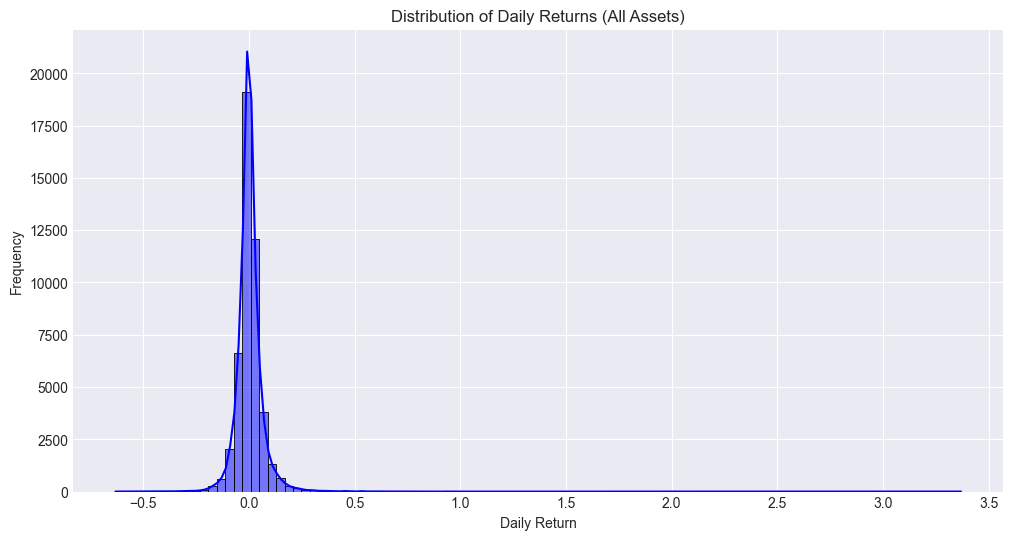

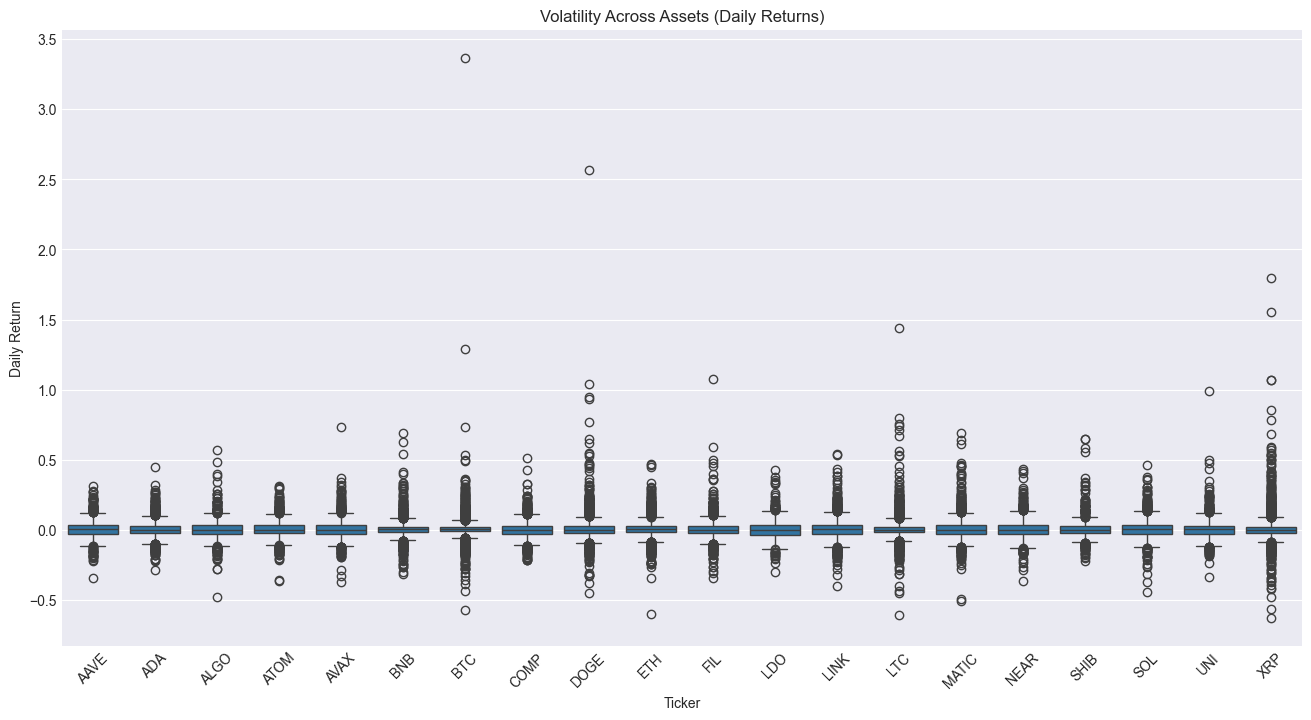

In [17]:
# Lets analyze and visual daily returns 

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of daily returns for a single asset or aggregated
plt.figure(figsize=(12, 6))
sns.histplot(combined_data['daily_return'], bins=100, kde=True, color='blue')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns (All Assets)')
plt.show()

# Optional: Boxplot grouped by assets
plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_data, x='ticker', y='daily_return')
plt.xlabel('Ticker')
plt.ylabel('Daily Return')
plt.title('Volatility Across Assets (Daily Returns)')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Evaluate risk return summary for each asset 

risk_return_summary = combined_data.groupby('ticker')['daily_return'].agg(['mean', 'std'])
risk_return_summary['risk_to_return'] = risk_return_summary['std'] / risk_return_summary['mean']
print(risk_return_summary)


            mean       std  risk_to_return
ticker                                    
AAVE    0.002822  0.059637       21.129761
ADA     0.001668  0.054410       32.628610
ALGO    0.001215  0.060696       49.937332
ATOM    0.001886  0.056294       29.850785
AVAX    0.003424  0.064961       18.973297
BNB     0.003995  0.056965       14.258970
BTC     0.004522  0.071440       15.798234
COMP    0.001303  0.060706       46.596178
DOGE    0.005201  0.087283       16.782634
ETH     0.003721  0.056926       15.300102
FIL     0.001353  0.062851       46.444012
LDO     0.002077  0.068035       32.751595
LINK    0.003822  0.065715       17.192016
LTC     0.002917  0.066976       22.962407
MATIC   0.004975  0.074169       14.907158
NEAR    0.003369  0.067237       19.955565
SHIB    0.003149  0.066087       20.988080
SOL     0.005475  0.067909       12.402863
UNI     0.003010  0.066835       22.207521
XRP     0.004808  0.090345       18.788738


Risk-to-Return table takeaway

Top Assets with Good Risk-Adjusted Returns:

- SOL, BTC, MATIC, and ETH have relatively low risk-to-return ratios, indicating they offer better returns per unit of risk.
- These assets could be considered "safer" relative to others in the cryptocurrency space.

High Volatility Assets:

- XRP and DOGE show high standard deviations, indicating significant price swings. While they may provide higher returns on some days, they are riskier investments.

Low Average Return Assets:

- ALGO and FIL have low average daily returns and high risk-to-return ratios, making them less attractive compared to other assets.

Diversification Opportunity:

- By analyzing these metrics across multiple assets, you can identify combinations of low-risk and high-growth cryptocurrencies to optimize a portfolio.


In [19]:
# Rolling volatility (30-day std of daily returns)
combined_data['rolling_volatility'] = combined_data.groupby('ticker')['daily_return'].transform(lambda x: x.rolling(30).std())


In [20]:
combined_data.head()

ticker       date   open   high    low  close  year  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08  2020           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08  2020      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42  2020      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60  2020      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59  2020      0.019186       NaN   

   30_day_MA  rolling_volatility  
0        NaN                 NaN  
1        NaN                 NaN  
2        NaN                 NaN  
3        NaN                 NaN  
4        NaN                 NaN

In [21]:
# Create correlation matrix between assets

pivot_data = combined_data.pivot(index='date', columns='ticker', values='close')
correlation_matrix = pivot_data.corr()


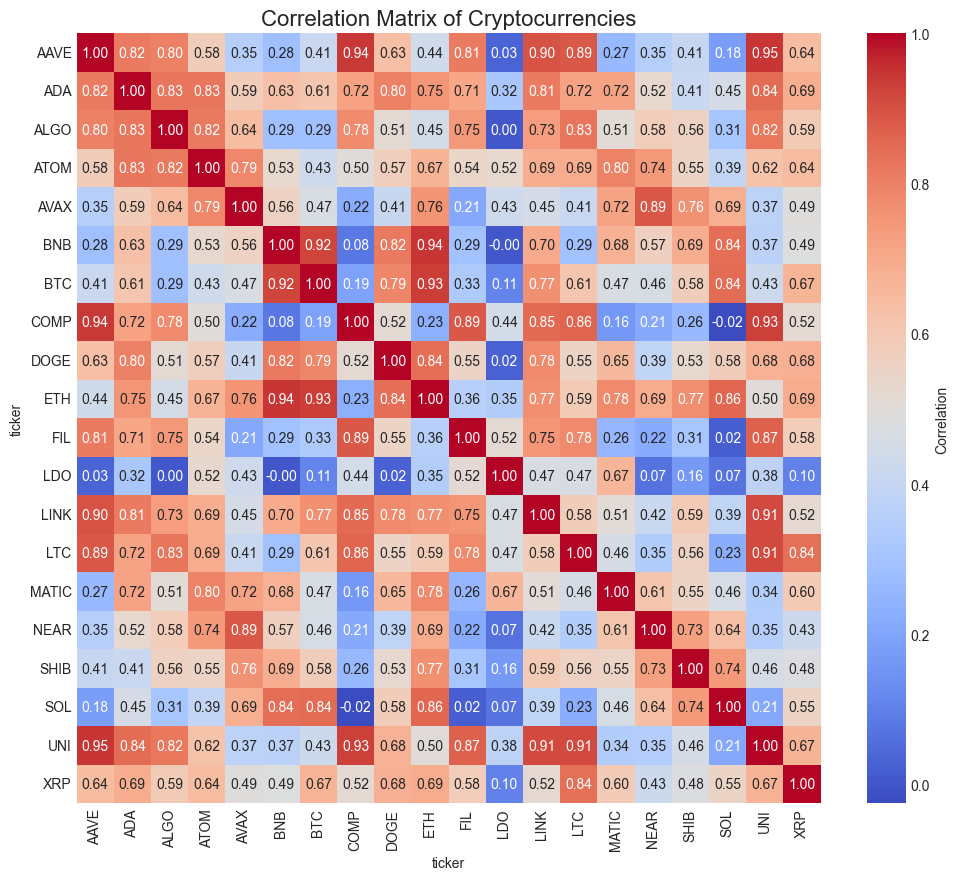

In [22]:
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix of Cryptocurrencies", fontsize=16)
plt.show()


Correlation Matrix Takeaways



High Correlation Among Major Assets: Cryptos like BTC, ETH, and ADA exhibit strong correlations, reflecting shared market dynamics and reducing diversification benefits when held together.

Low-Correlation Opportunities: Assets like DOGE and XRP show weaker correlations, making them valuable for portfolio diversification.

Clustered Behavior: Cryptos from similar sectors (e.g., DeFi tokens like AAVE, COMP) tend to move together, highlighting sector-driven trends.

Market Cohesion: The overall positive correlations indicate the crypto market behaves as a single asset class, heavily influenced by macro trends.

Diversification Strategy: Combining low-correlation assets with highly correlated clusters can improve portfolio performance and manage risk.

# Momentum Analysis

C:\Users\alecs\AppData\Local\Temp\ipykernel_3760\261684759.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



  ticker       date   open   high    low  close  year  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08  2020           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08  2020      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42  2020      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60  2020      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59  2020      0.019186       NaN   

   30_day_MA  rolling_volatility  signal  
0        NaN                 NaN       0  
1        NaN                 NaN       0  
2        NaN                 NaN       0  
3        NaN                 NaN       0  
4        NaN                 NaN       0  
Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'year',
       'daily_return', '7_day_MA', '30_day_MA', 'rolling_volatility',
       'signal'],
      dtype='object')


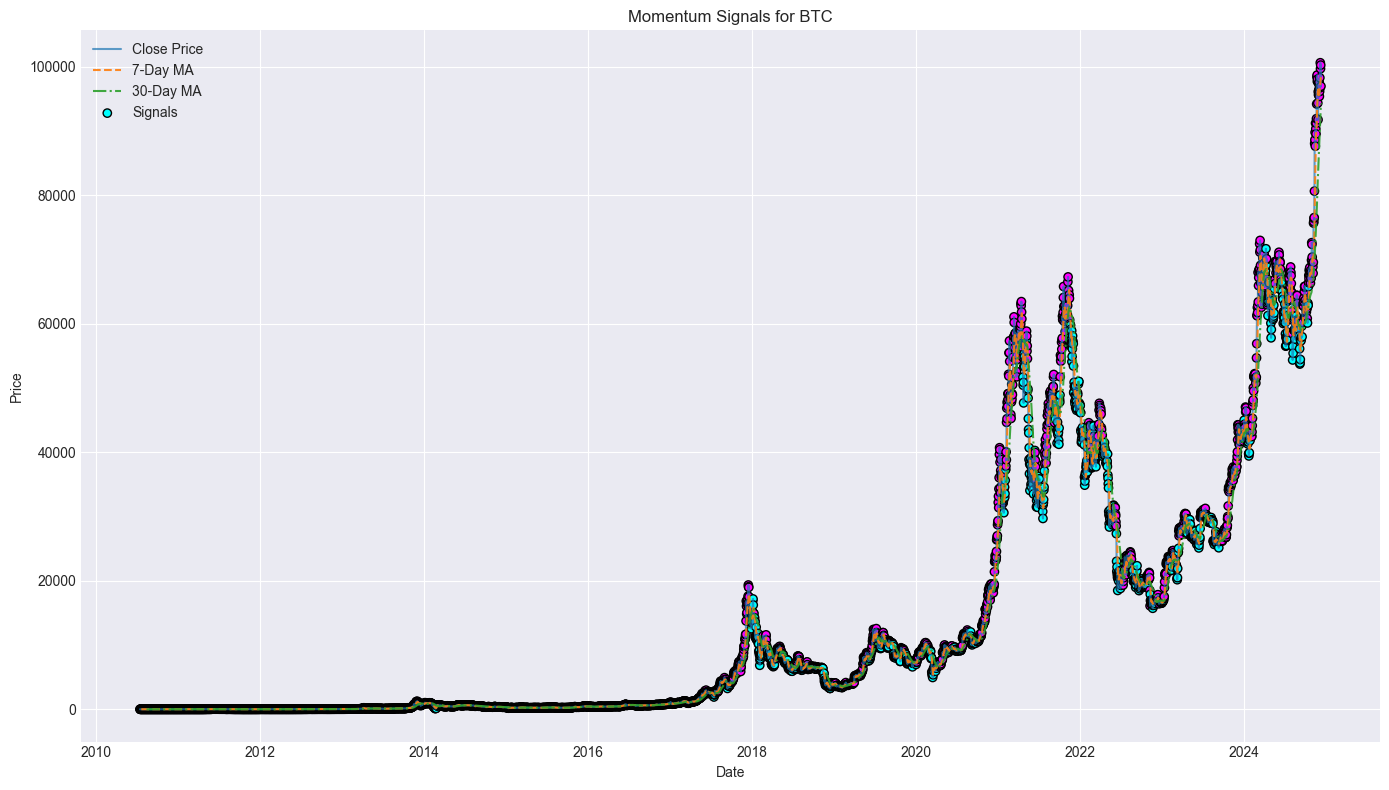

In [23]:
# Step 1: Define the signal calculation function
def calculate_signals(data):
    # Add a 'signal' column: 1 for buy, 0 for sell
    data['signal'] = 0
    data['signal'] = (data['7_day_MA'] > data['30_day_MA']).astype(int)
    return data

# Step 2: Apply the function group-wise and reset the index
combined_data = combined_data.groupby('ticker').apply(calculate_signals).reset_index(drop=True)

# Step 3: Verify the structure of the DataFrame
print(combined_data.head())  # Ensure the index is flat and 'ticker' is a column
print(combined_data.columns)  # Check for correct columns

# Step 4: Filter the data for a specific asset (e.g., BTC)
asset = 'BTC'
asset_data = combined_data[combined_data['ticker'] == asset]

# Step 5: Plot the momentum analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(asset_data['date'], asset_data['close'], label='Close Price', alpha=0.7)
plt.plot(asset_data['date'], asset_data['7_day_MA'], label='7-Day MA', linestyle='--', alpha=0.9)
plt.plot(asset_data['date'], asset_data['30_day_MA'], label='30-Day MA', linestyle='-.', alpha=0.9)

# Highlight buy and sell signals
plt.scatter(
    asset_data['date'], 
    asset_data['close'], 
    c=asset_data['signal'], 
    cmap='cool', 
    label='Signals', 
    edgecolor='black'
)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Momentum Signals for {asset}')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
combined_data.head()

ticker       date   open   high    low  close  year  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08  2020           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08  2020      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42  2020      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60  2020      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59  2020      0.019186       NaN   

   30_day_MA  rolling_volatility  signal  
0        NaN                 NaN       0  
1        NaN                 NaN       0  
2        NaN                 NaN       0  
3        NaN                 NaN       0  
4        NaN                 NaN       0

# Seasonality Analysis


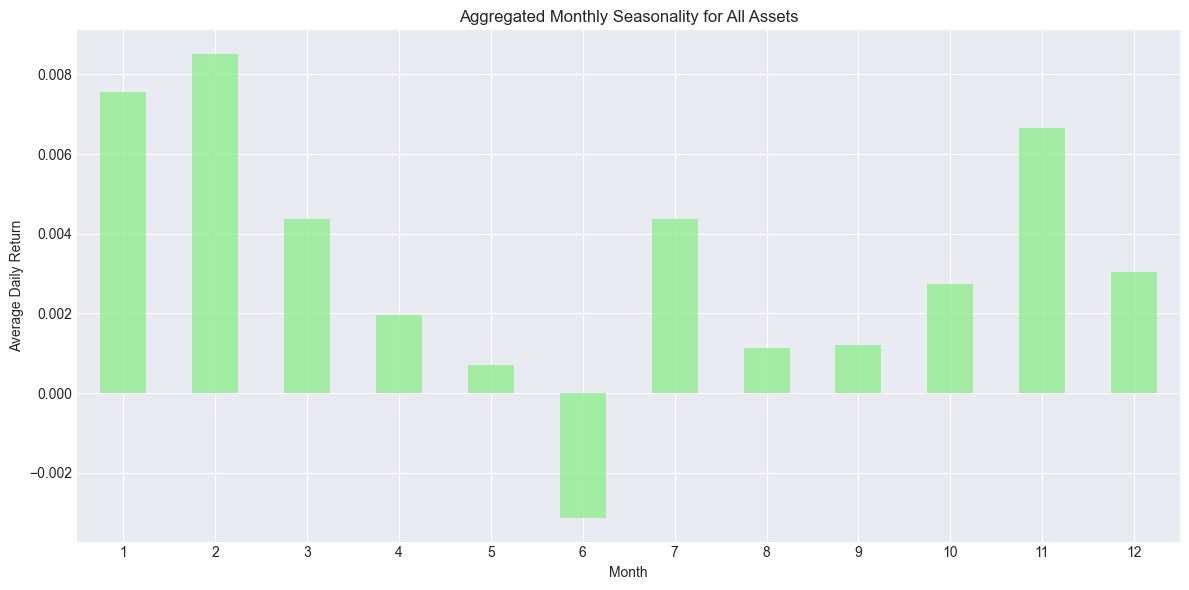

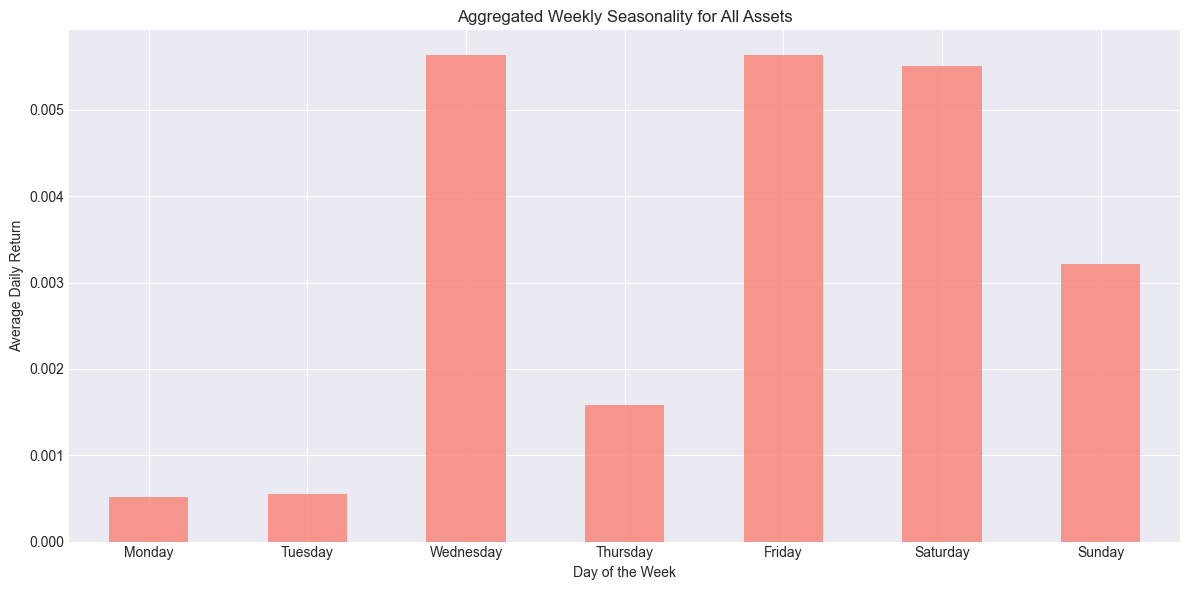

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming combined_data is the DataFrame containing the data with 'date', 'ticker', and 'daily_return'

# Add time-based features
combined_data['month'] = combined_data['date'].dt.month
combined_data['day_of_week'] = combined_data['date'].dt.day_name()

# Average monthly returns for all assets
monthly_returns = combined_data.groupby(['ticker', 'month'])['daily_return'].mean().unstack()

# Aggregate monthly returns for all assets
aggregated_monthly_returns = monthly_returns.mean(axis=0)

# Plot aggregated average monthly returns for all assets
plt.figure(figsize=(12, 6))
aggregated_monthly_returns.plot(kind='bar', color='lightgreen', alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Average Daily Return')
plt.title('Aggregated Monthly Seasonality for All Assets')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Average daily returns by day of the week for all assets
weekday_returns = combined_data.groupby(['ticker', 'day_of_week'])['daily_return'].mean().unstack()

# Aggregate weekday returns for all assets
aggregated_weekday_returns = weekday_returns.mean(axis=0).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot aggregated average weekday returns for all assets
plt.figure(figsize=(12, 6))
aggregated_weekday_returns.plot(kind='bar', color='salmon', alpha=0.8)
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Return')
plt.title('Aggregated Weekly Seasonality for All Assets')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


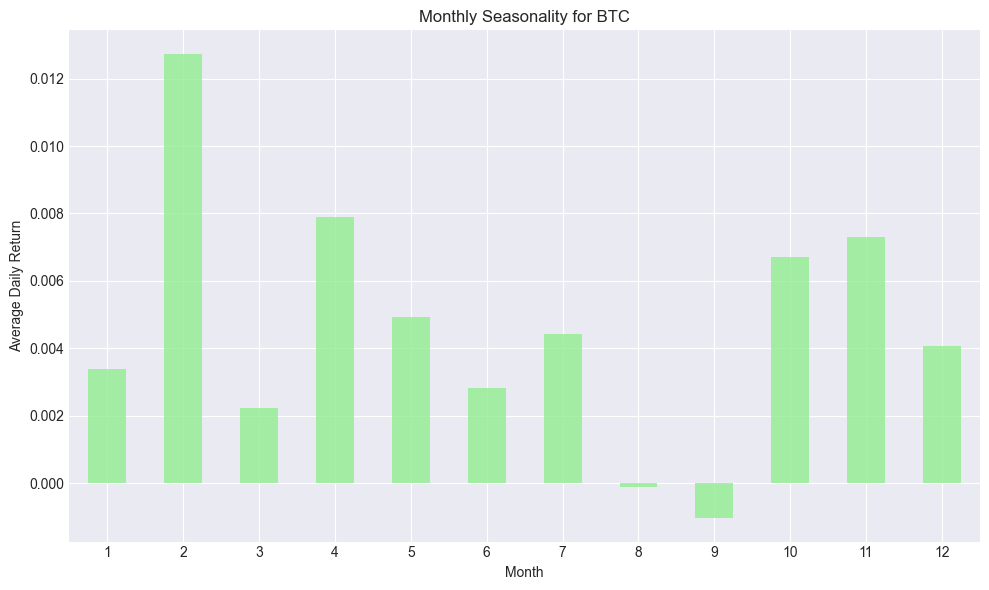

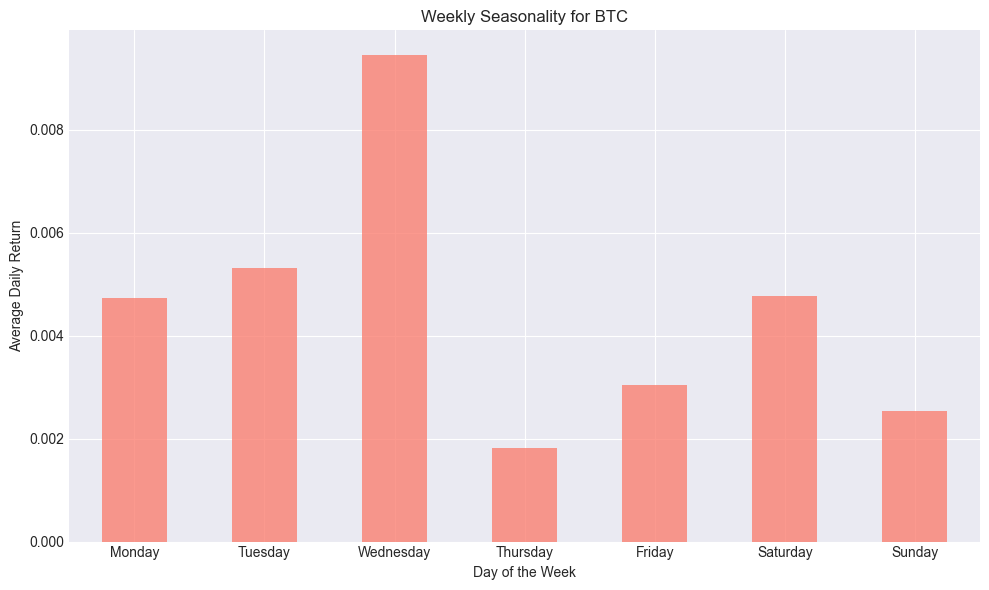

In [26]:
# Add time-based features
combined_data['month'] = combined_data['date'].dt.month
combined_data['day_of_week'] = combined_data['date'].dt.day_name()

# Average monthly returns
monthly_returns = combined_data.groupby(['ticker', 'month'])['daily_return'].mean().unstack()

# Plot average monthly returns for a single asset
asset = 'BTC'
monthly_returns.loc[asset].plot(kind='bar', figsize=(10, 6), color='lightgreen', alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Average Daily Return')
plt.title(f'Monthly Seasonality for {asset}')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Average daily returns by day of the week
weekday_returns = combined_data.groupby(['ticker', 'day_of_week'])['daily_return'].mean().unstack()

# Plot weekday returns
weekday_returns.loc[asset].reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(
    kind='bar', figsize=(10, 6), color='salmon', alpha=0.8)
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Return')
plt.title(f'Weekly Seasonality for {asset}')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



In [27]:
# Step 1: Extract month (ignoring year) from the date
combined_data['month'] = combined_data['date'].dt.month  # Extract the month

# Step 2: Calculate monthly returns for each asset, grouped by month (not year)
monthly_returns = combined_data.groupby(['ticker', 'month'])['daily_return'].apply(
    lambda x: (np.prod(1 + x) - 1)
).reset_index(name='monthly_return')

# Step 3: Find the top 5 performing assets for each month across all years
top_assets_per_month = monthly_returns.groupby('month').apply(
    lambda x: x.nlargest(5, 'monthly_return')
).reset_index(drop=True)

# Step 4: Format the table to display month, asset, and their returns
top_assets_per_month['month_name'] = top_assets_per_month['month'].apply(
    lambda x: pd.to_datetime(f"2023-{x}-01").strftime('%B')  # Map month numbers to names
)
top_assets_per_month = top_assets_per_month[['month_name', 'ticker', 'monthly_return']]

# Step 5: Sort by month for display
top_assets_per_month = top_assets_per_month.sort_values(by='month_name')

# Step 6: Rename columns for better readability
top_assets_per_month.rename(columns={
    'month_name': 'Month', 
    'ticker': 'Asset', 
    'monthly_return': 'Monthly Return'
}, inplace=True)

# Display the table
print(top_assets_per_month)


        Month  Asset  Monthly Return
19      April    ETH        2.872250
17      April    XRP        6.384048
16      April    BTC       13.675062
15      April   DOGE       22.836264
18      April    BNB        3.193941
39     August   DOGE        0.214809
35     August    SOL        3.389106
36     August   AVAX        0.614861
37     August   NEAR        0.538890
38     August   ATOM        0.341220
58   December   NEAR        1.721092
59   December    XRP        1.373473
55   December    BNB        4.137994
56   December    BTC        2.350051
57   December   DOGE        1.970633
7    February  MATIC        7.826721
6    February    ETH        8.096006
5    February    BNB        9.226363
8    February    BTC        4.738748
9    February    SOL        2.526322
0     January    ETH        7.954252
4     January    SOL        2.884591
1     January   LINK        4.028091
2     January   DOGE        3.956351
3     January   AVAX        3.237118
34       July   LINK        1.436537
3

C:\Users\alecs\AppData\Local\Temp\ipykernel_3760\2900890764.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



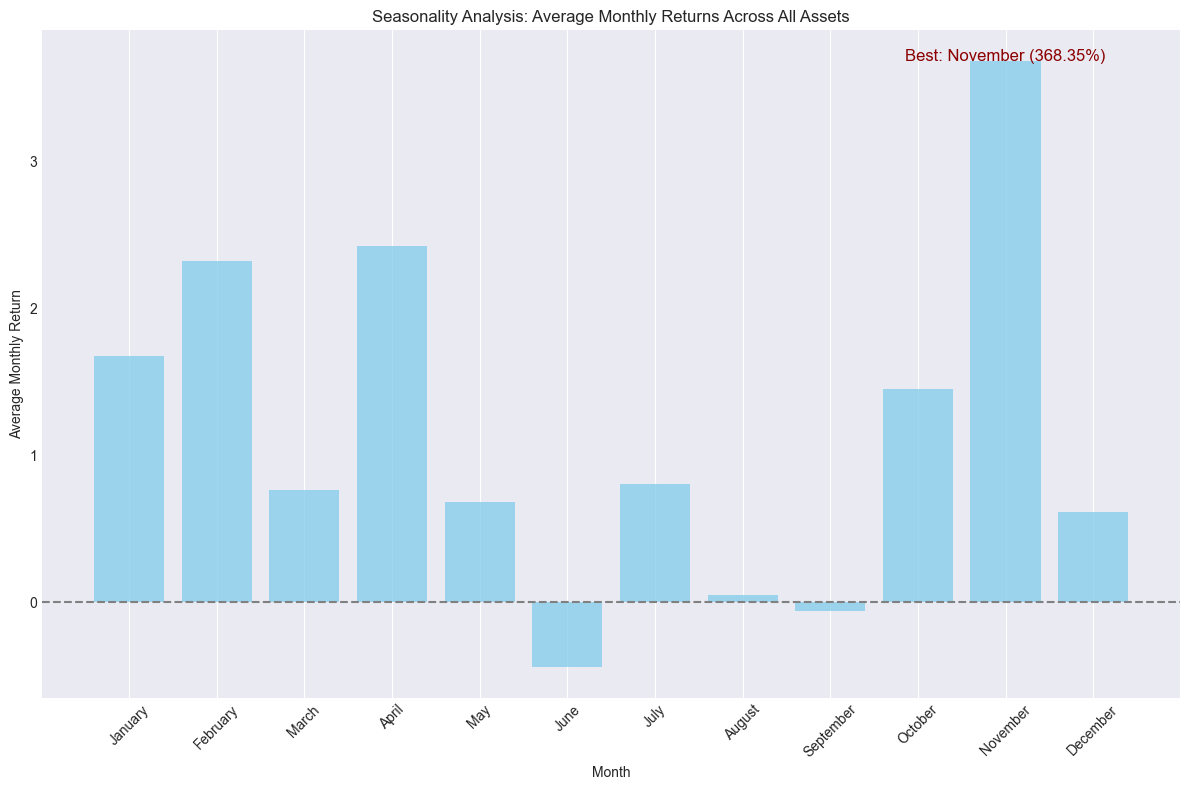

The best-performing month is November with an average return of 368.35%.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Add time-based features
combined_data['month'] = combined_data['date'].dt.month

# Step 2: Calculate monthly returns for each asset
monthly_returns = combined_data.groupby(['ticker', 'month'])['daily_return'].apply(
    lambda x: np.prod(1 + x) - 1
).reset_index(name='monthly_return')

# Step 3: Aggregate monthly returns across all assets
average_monthly_returns = monthly_returns.groupby('month')['monthly_return'].mean().reset_index()

# Map month numbers to month names for readability
average_monthly_returns['month_name'] = average_monthly_returns['month'].apply(
    lambda x: pd.to_datetime(f"2023-{x}-01").strftime('%B')
)

# Step 4: Identify the best-performing month
best_month = average_monthly_returns.loc[average_monthly_returns['monthly_return'].idxmax()]

# Step 5: Plot average monthly returns for all assets
plt.figure(figsize=(12, 8))
plt.bar(
    average_monthly_returns['month_name'], 
    average_monthly_returns['monthly_return'], 
    color='skyblue', alpha=0.8
)
plt.axhline(y=0, color='gray', linestyle='--')  # Add a line for zero
plt.text(
    best_month['month_name'], 
    best_month['monthly_return'], 
    f"Best: {best_month['month_name']} ({best_month['monthly_return']:.2%})", 
    color='darkred', fontsize=12, ha='center'
)
plt.xlabel('Month')
plt.ylabel('Average Monthly Return')
plt.title('Seasonality Analysis: Average Monthly Returns Across All Assets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 6: Display the best month for reference
print(f"The best-performing month is {best_month['month_name']} with an average return of {best_month['monthly_return']:.2%}.")


# Time Series Modeling

We will start this section focused on the most institutionally relevant assets including BTC, ETH, SOL, and LINK

In [29]:
# Step 1: Filter data for the selected assets
selected_assets = ['BTC', 'ETH', 'LINK', 'SOL']
asset_data = combined_data[combined_data['ticker'].isin(selected_assets)][['ticker', 'date', 'close']]

# Ensure the 'date' column is datetime and set it as the index for each asset
asset_data['date'] = pd.to_datetime(asset_data['date'])
asset_data.set_index('date', inplace=True)

# Create a dictionary to hold time series data for each asset
asset_series = {asset: asset_data[asset_data['ticker'] == asset][['close']] for asset in selected_assets}


In [30]:
from pmdarima import auto_arima

# List of assets to forecast
selected_assets = ['BTC', 'ETH', 'LINK', 'SOL']
forecast_horizon = 30  # Number of days to forecast
forecasts = {}

for asset in selected_assets:
    if asset in asset_series:  # Check if the asset exists in asset_series
        # Prepare the series
        series = asset_series[asset]['close']

        # Fit ARIMA model
        model = auto_arima(series, seasonal=False, trace=True, suppress_warnings=True)

        # Forecast future values
        forecast = model.predict(n_periods=forecast_horizon)
        forecasts[asset] = forecast
    else:
        print(f"Data for {asset} is not available in asset_series.")

# Print forecasts
print(forecasts)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=84599.960, Time=5.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84596.682, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=84598.517, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=84598.525, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84597.838, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=84600.349, Time=1.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 7.488 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38360.059, Time=6.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38362.008, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38361.171, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38361.323, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38360.913, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38359.166, Time=4.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept

C:\Users\alecs\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10096.310, Time=4.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10111.026, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10112.003, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10112.073, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10110.279, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10109.449, Time=1.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10113.321, Time=1.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10098.083, Time=4.74 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10112.417, Time=0.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10110.260, Time=1.63 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10111.110, Time=2.04 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10099.260, Time=6.24 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10095.501, Time=2.41 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=1.28 sec
 ARIMA(

In [31]:
combined_data.head()

ticker       date   open   high    low  close  year  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08  2020           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08  2020      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42  2020      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60  2020      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59  2020      0.019186       NaN   

   30_day_MA  rolling_volatility  signal  month day_of_week  
0        NaN                 NaN       0     10    Saturday  
1        NaN                 NaN       0     10      Sunday  
2        NaN                 NaN       0     10      Monday  
3        NaN                 NaN       0     10     Tuesday  
4        NaN                 NaN       0     10   Wednesday

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=84599.960, Time=5.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84596.682, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=84598.517, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=84598.525, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84597.838, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=84600.349, Time=1.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 7.469 seconds


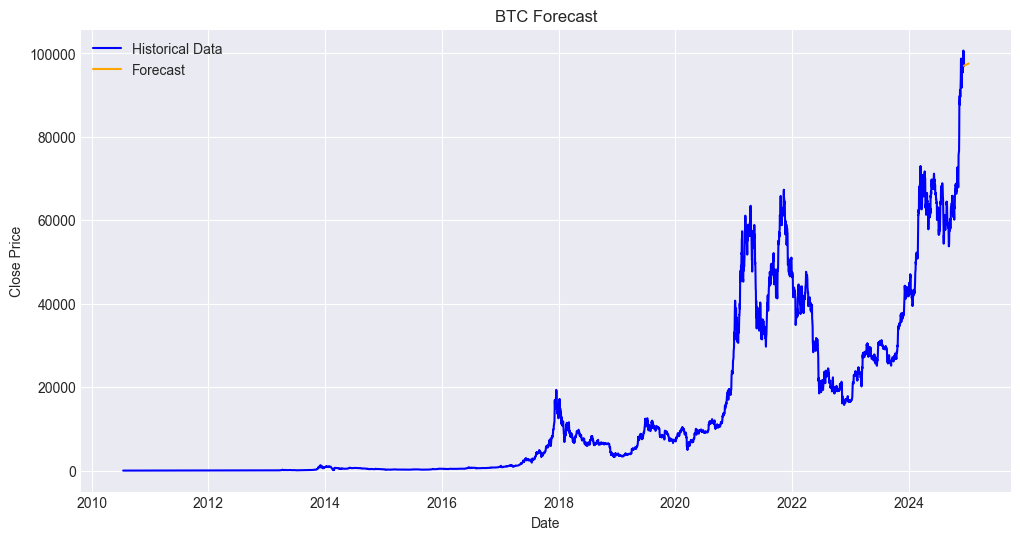

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38360.059, Time=5.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38362.008, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38361.171, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38361.323, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38360.913, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=38359.166, Time=3.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=38360.666, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38354.693, Time=3.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=38359.453, Time=3.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=38360.752, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=38353.636, Time=1.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=38360.283, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=38360.134, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=38358.262, Time=1.84 sec
 ARIMA(1,1,2)(0,0,0

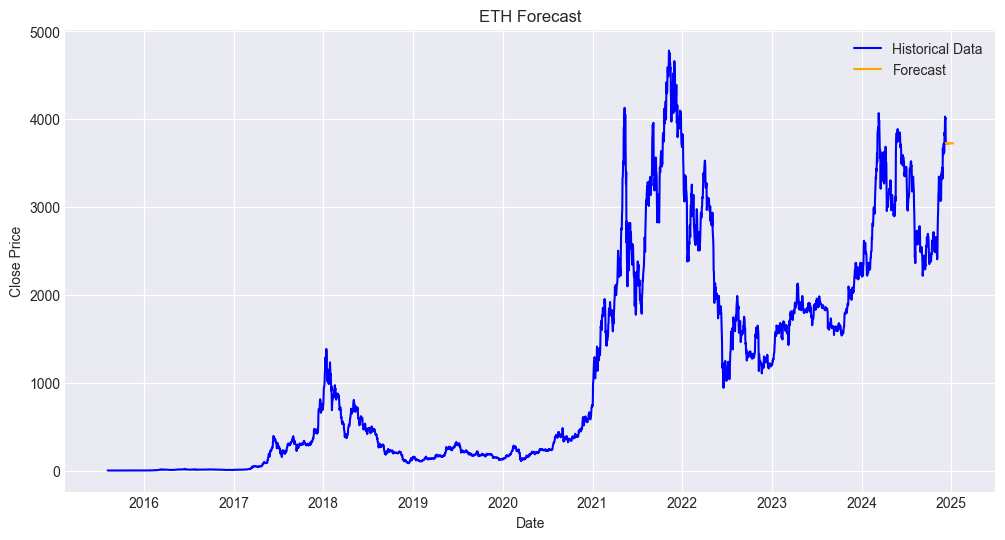

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6440.382, Time=6.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6465.727, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6453.791, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6454.646, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6463.997, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6454.232, Time=3.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6454.579, Time=1.65 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6442.516, Time=9.85 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6411.435, Time=4.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6440.078, Time=2.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6396.428, Time=8.42 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=6391.908, Time=5.92 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6390.136, Time=5.60 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6415.484, Time=2.70 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

C:\Users\alecs\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



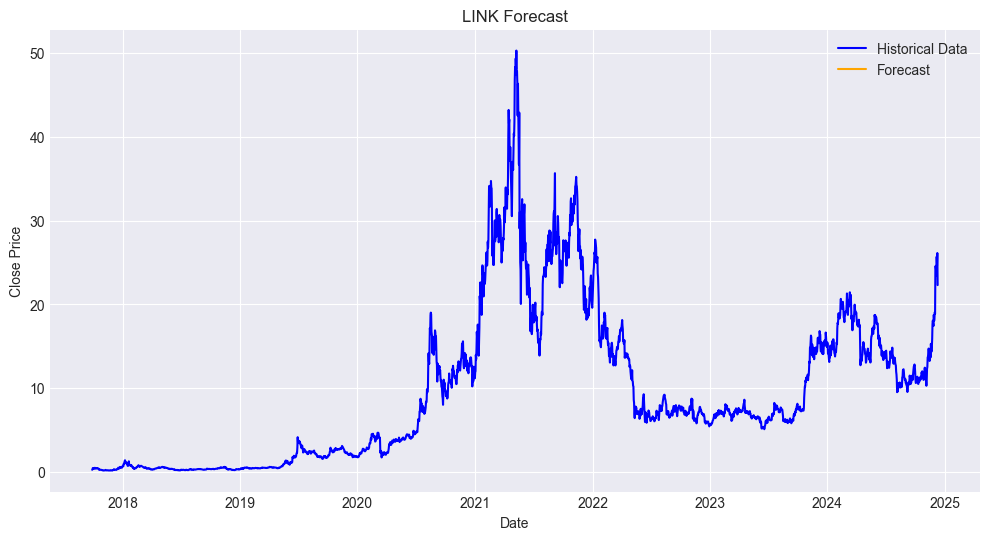

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10096.310, Time=4.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10111.026, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10112.003, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10112.073, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10110.279, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10109.449, Time=1.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10113.321, Time=1.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10098.083, Time=4.93 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10112.417, Time=0.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10110.260, Time=1.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10111.110, Time=2.39 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10099.260, Time=6.77 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10095.501, Time=2.36 sec
 ARIMA(1,1,2)(0,0,0)[0]  

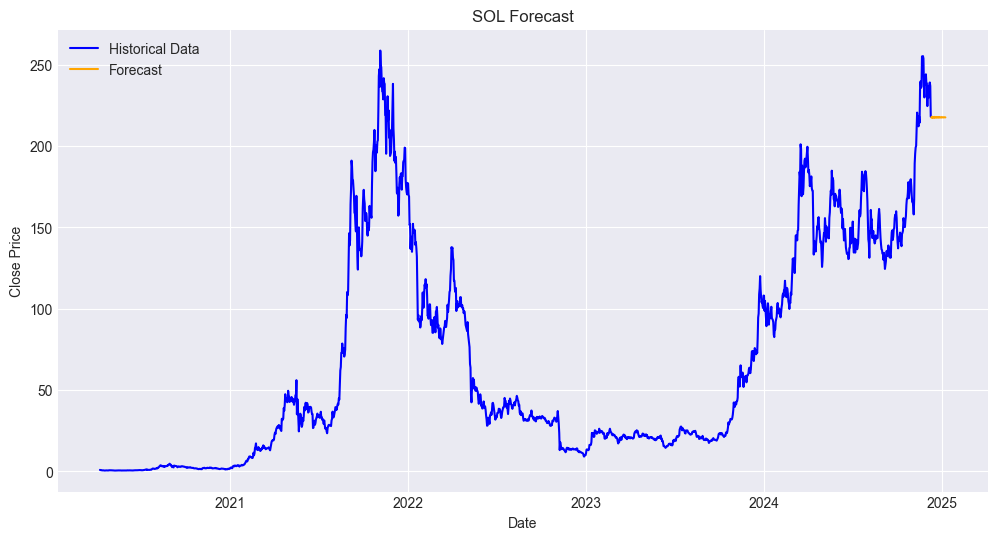

Forecasted Changes (Price Change after 30 days):
BTC: 553.30
ETH: 7.42
LINK: nan
SOL: -0.39

Based on the forecasted price changes, the best asset to buy is: BTC


In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima

# Forecast horizon
forecast_horizon = 30
selected_assets = ['BTC', 'ETH', 'LINK', 'SOL']

# Initialize forecasts dictionary
forecasts = {}
forecast_changes = {}

# Loop through each asset for forecasting
for asset in selected_assets:
    series = asset_series[asset]['close']
    
    # Fit ARIMA model and generate forecast (if not already done)
    model = auto_arima(series, seasonal=False, trace=True, suppress_warnings=True)
    forecast = model.predict(n_periods=forecast_horizon)
    forecasts[asset] = forecast

    # Reindex forecast to align with the last known date in the series
    forecast_index = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='D')
    forecast_series = pd.Series(forecast, index=forecast_index)
    
    # Calculate forecast change (difference between forecasted last value and last known value)
    forecast_change = forecast_series.iloc[-1] - series.iloc[-1]  # Using iloc to access the last element of the series
    forecast_changes[asset] = forecast_change

    # Plot historical and forecasted data
    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Historical Data', color='blue')
    plt.plot(forecast_series, label='Forecast', color='orange')
    plt.title(f"{asset} Forecast")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Print forecast changes to decide which asset to buy
print("Forecasted Changes (Price Change after 30 days):")
for asset, change in forecast_changes.items():
    print(f"{asset}: {change:.2f}")

# Determine which asset has the highest positive forecast change
best_asset = max(forecast_changes, key=forecast_changes.get)
print(f"\nBased on the forecasted price changes, the best asset to buy is: {best_asset}")


In [33]:
# Generate signals based on forecast
signals = {}

for asset, forecast in forecasts.items():
    # Combine historical and forecast data
    historical_data = asset_series[asset]['close']
    forecast_series = pd.Series(
        forecast, 
        index=pd.date_range(start=historical_data.index[-1] + pd.Timedelta(days=1), periods=len(forecast), freq='D')
    )
    combined_data = pd.concat([historical_data, forecast_series])

    # Calculate moving averages
    combined_data = combined_data.to_frame(name='close')  # Convert to DataFrame for moving average calculation
    combined_data['7_day_MA'] = combined_data['close'].rolling(window=7).mean()
    combined_data['30_day_MA'] = combined_data['close'].rolling(window=30).mean()

    # Generate signals
    combined_data['signal'] = 0
    combined_data.loc[combined_data['close'] > combined_data['7_day_MA'], 'signal'] = 1  # Buy
    combined_data.loc[combined_data['close'] < combined_data['30_day_MA'], 'signal'] = -1  # Sell

    signals[asset] = combined_data



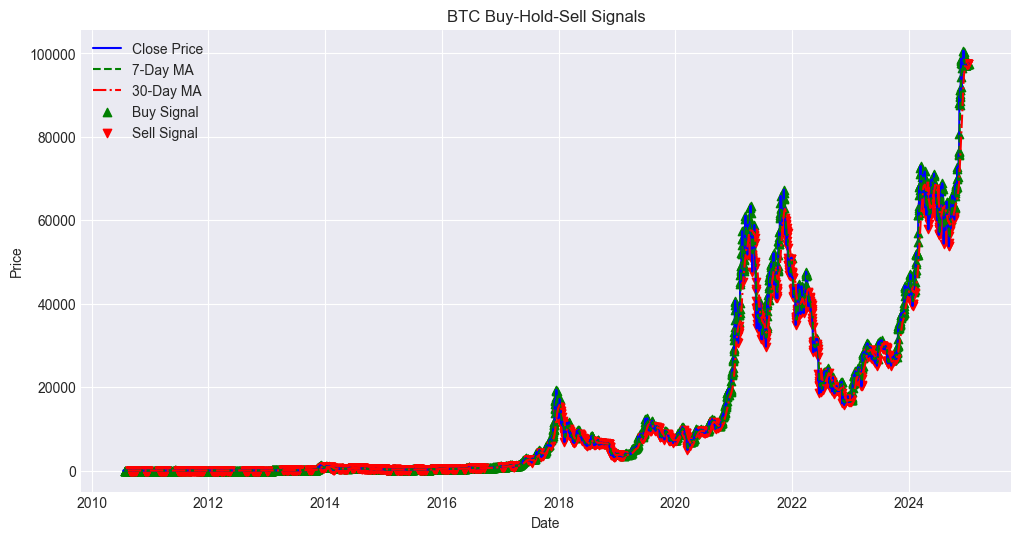

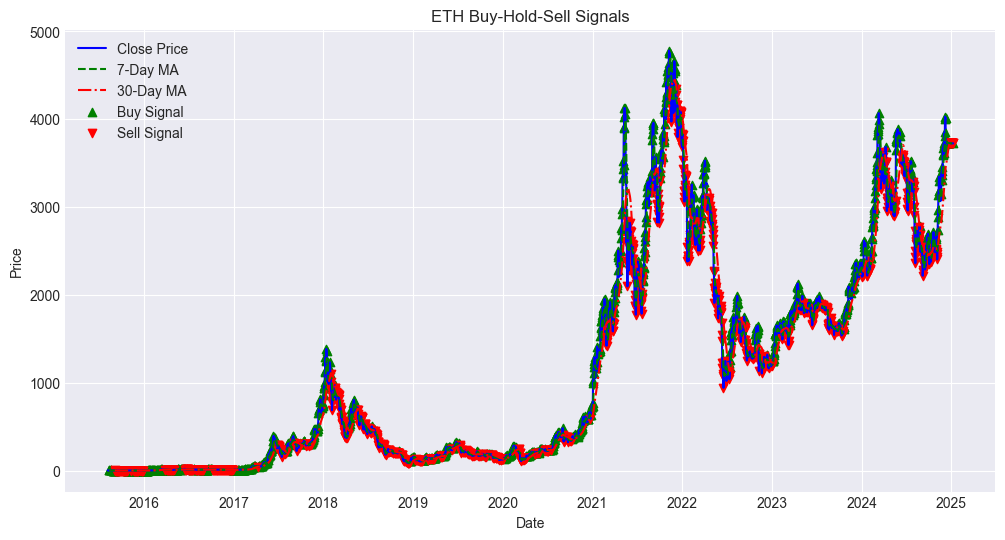

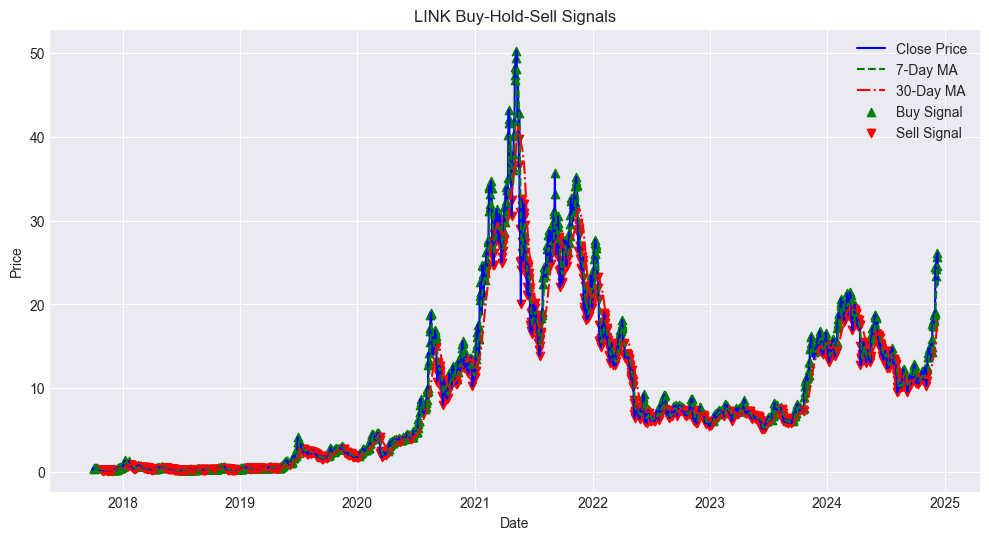

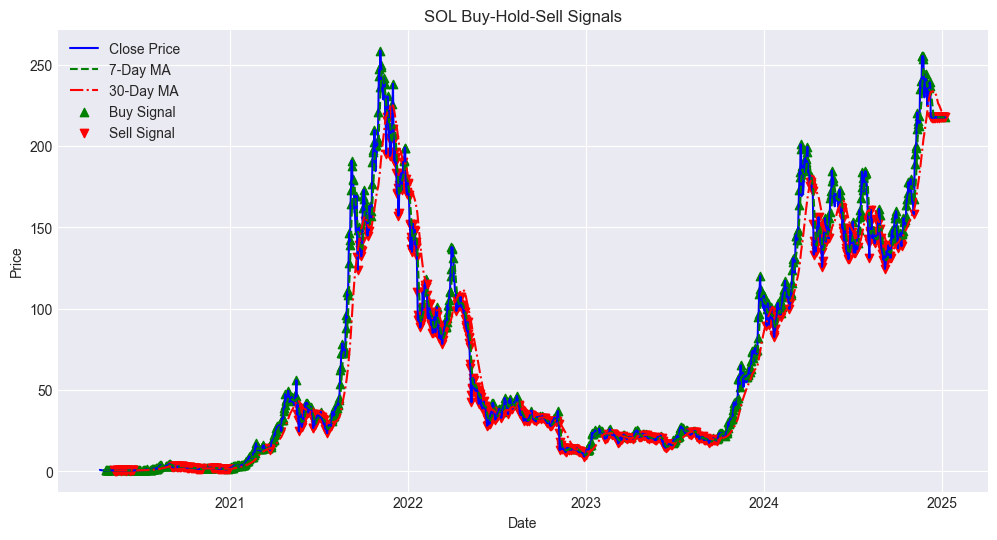

In [34]:
for asset, data in signals.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['close'], label='Close Price', color='blue')
    plt.plot(data.index, data['7_day_MA'], label='7-Day MA', linestyle='--', color='green')
    plt.plot(data.index, data['30_day_MA'], label='30-Day MA', linestyle='-.', color='red')

    # Highlight signals
    buy_signals = data[data['signal'] == 1]
    sell_signals = data[data['signal'] == -1]
    plt.scatter(buy_signals.index, buy_signals['close'], marker='^', color='green', label='Buy Signal', alpha=1)
    plt.scatter(sell_signals.index, sell_signals['close'], marker='v', color='red', label='Sell Signal', alpha=1)

    plt.title(f"{asset} Buy-Hold-Sell Signals")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


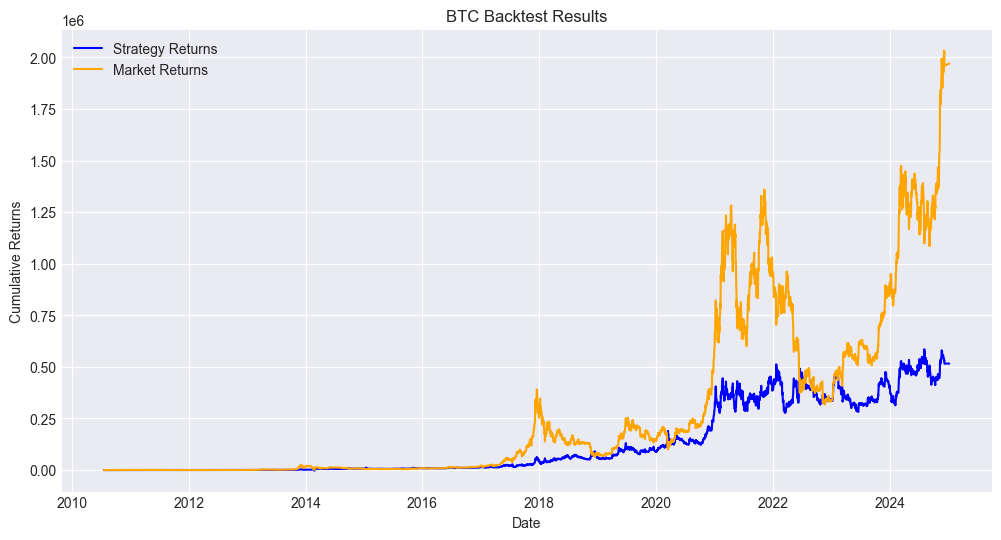

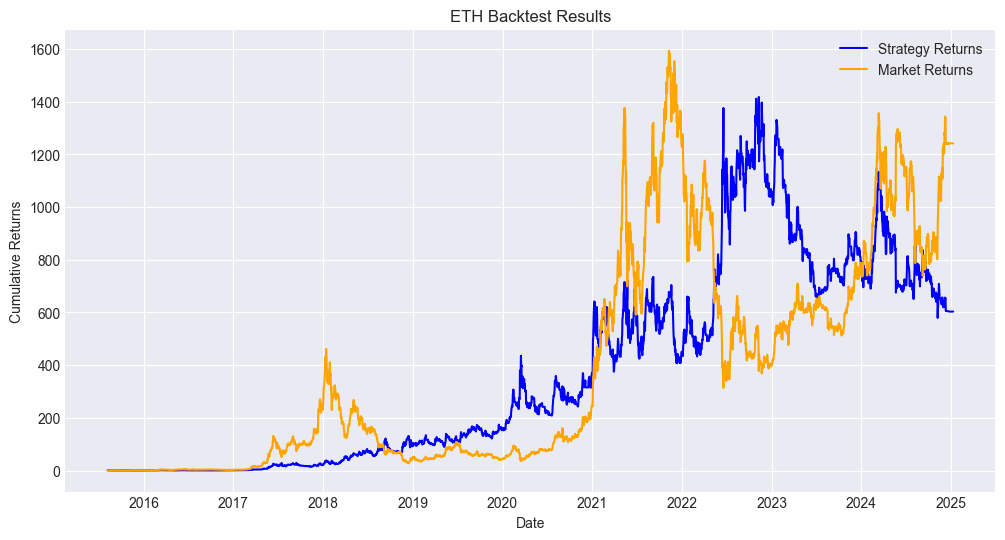

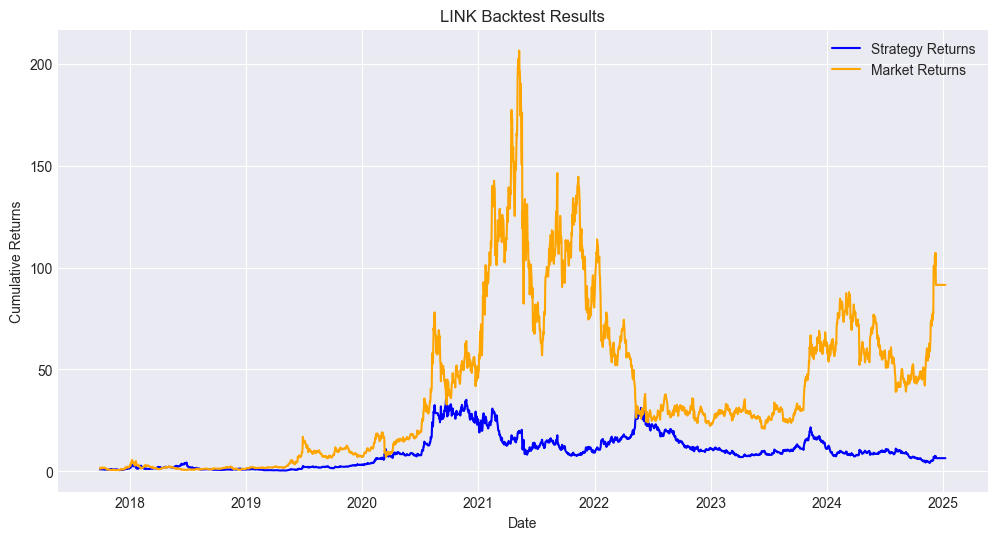

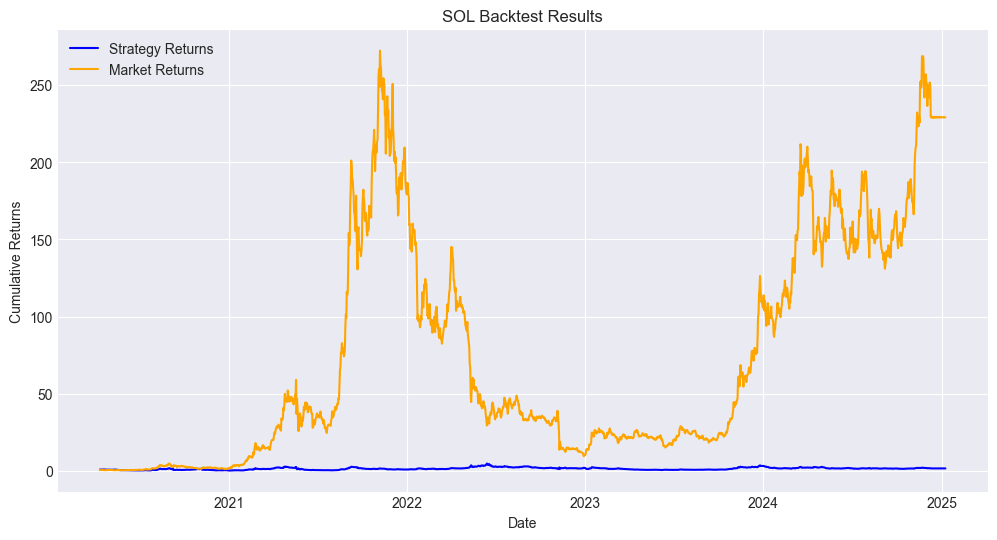

{'BTC': {'strategy_returns': 515881.90399415797, 'market_returns': 1970236.265255766}, 'ETH': {'strategy_returns': 603.3126098189323, 'market_returns': 1241.3748216046008}, 'LINK': {'strategy_returns': 6.50796910766362, 'market_returns': 91.49240869922025}, 'SOL': {'strategy_returns': 1.7325985076348371, 'market_returns': 229.1134653063243}}


In [35]:
# Backtest strategy
results = {}

for asset, data in signals.items():
    data['returns'] = data['close'].pct_change()
    data['strategy_returns'] = data['returns'] * data['signal'].shift(1)
    
    cumulative_strategy_returns = (1 + data['strategy_returns']).cumprod()
    cumulative_market_returns = (1 + data['returns']).cumprod()
    
    results[asset] = {
        'strategy_returns': cumulative_strategy_returns.iloc[-1],
        'market_returns': cumulative_market_returns.iloc[-1]
    }

    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_strategy_returns, label='Strategy Returns', color='blue')
    plt.plot(cumulative_market_returns, label='Market Returns', color='orange')
    plt.title(f"{asset} Backtest Results")
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

print(results)


It is clear ARIMA models do not provide good forecasts for this data as all the backtesting results led to worse results than the market


# Prophet Model

In [36]:
from prophet import Prophet

# Train a Prophet model
prophet_data = historical_data.reset_index().rename(columns={'date': 'ds', 'close': 'y'})
model = Prophet()
model.fit(prophet_data)

# Forecast future values
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


16:35:12 - cmdstanpy - INFO - Chain [1] start processing
16:35:14 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
combined_data_2 = combined_data.copy()

In [38]:

# Calculate RSI
combined_data_2['RSI'] = ta.rsi(combined_data_2['close'], length=14)

# Generate signals
combined_data_2['signal'] = 0
combined_data_2.loc[combined_data_2['RSI'] < 30, 'signal'] = 1  # Buy (oversold)
combined_data_2.loc[combined_data_2['RSI'] > 70, 'signal'] = -1  # Sell (overbought)


In [39]:
combined_data_2.head()

close  7_day_MA  30_day_MA  signal   returns  strategy_returns  \
2020-04-10  0.9496       NaN        NaN       0       NaN               NaN   
2020-04-11  0.7973       NaN        NaN       0 -0.160383              -0.0   
2020-04-12  0.8830       NaN        NaN       0  0.107488               0.0   
2020-04-13  0.7772       NaN        NaN       0 -0.119819              -0.0   
2020-04-14  0.6664       NaN        NaN       0 -0.142563              -0.0   

            RSI  
2020-04-10  NaN  
2020-04-11  NaN  
2020-04-12  NaN  
2020-04-13  NaN  
2020-04-14  NaN

In [40]:
combined_data.head()

close  7_day_MA  30_day_MA  signal   returns  strategy_returns
2020-04-10  0.9496       NaN        NaN       0       NaN               NaN
2020-04-11  0.7973       NaN        NaN       0 -0.160383              -0.0
2020-04-12  0.8830       NaN        NaN       0  0.107488               0.0
2020-04-13  0.7772       NaN        NaN       0 -0.119819              -0.0
2020-04-14  0.6664       NaN        NaN       0 -0.142563              -0.0

In [41]:

# Add RSI to the data
for asset, data in asset_series.items():
    data['RSI'] = ta.rsi(data['close'], length=14)


In [42]:
# Generate Buy-Hold-Sell signals based on RSI
for asset, data in asset_series.items():
    data['signal'] = 0  # Default signal
    data.loc[data['RSI'] < 30, 'signal'] = 1  # Buy Signal
    data.loc[data['RSI'] > 70, 'signal'] = -1  # Sell Signal


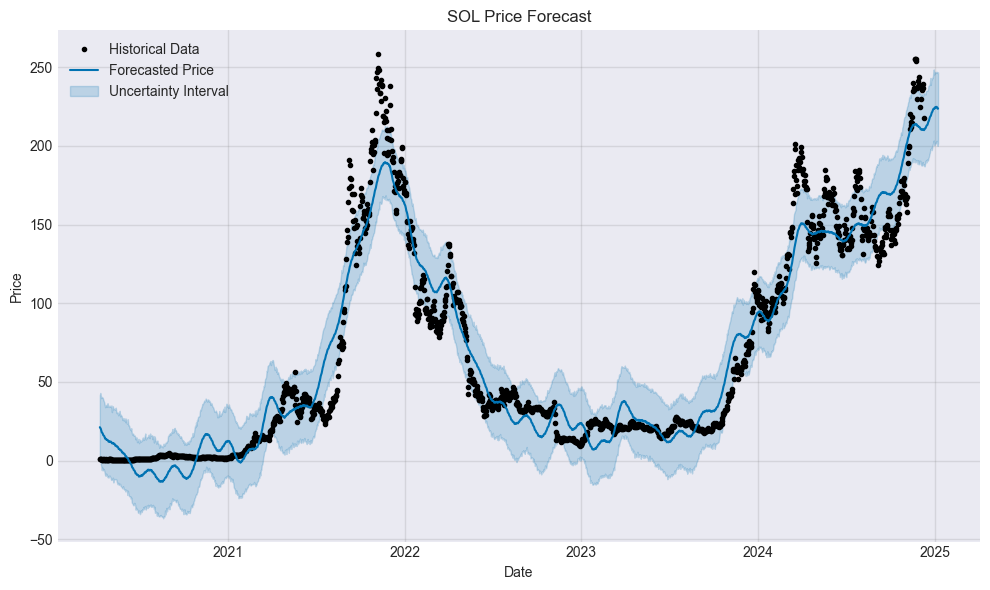

In [43]:
# Plot the forecast with a legend
fig = model.plot(forecast)
plt.title(f"{asset} Price Forecast")
plt.xlabel("Date")
plt.ylabel("Price")

# Add a legend
plt.legend(['Historical Data', 'Forecasted Price', 'Uncertainty Interval'], loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Processing asset: BTC


16:56:22 - cmdstanpy - INFO - Chain [1] start processing
16:56:26 - cmdstanpy - INFO - Chain [1] done processing


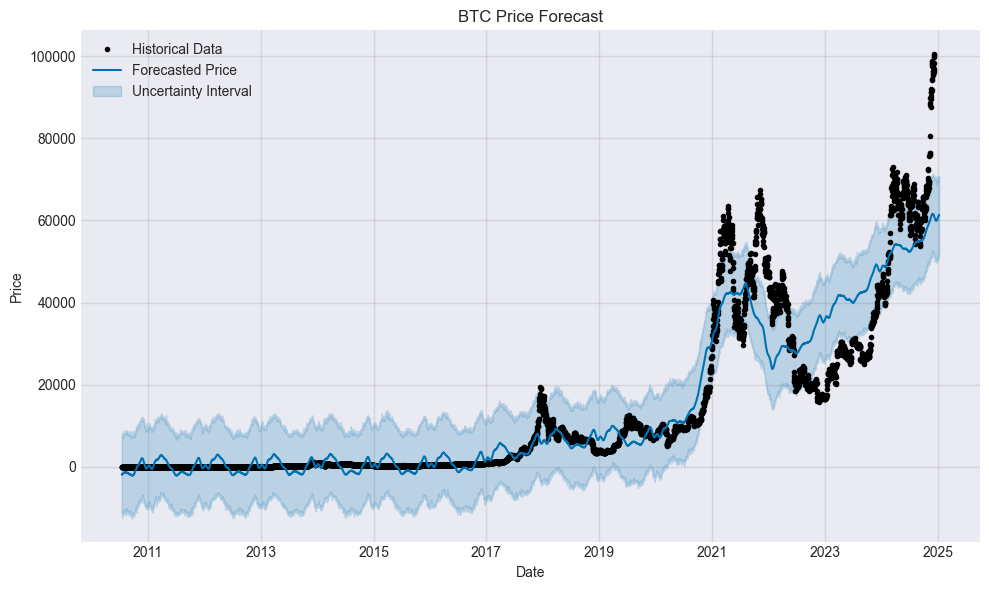

Processing asset: ETH


16:56:31 - cmdstanpy - INFO - Chain [1] start processing
16:56:33 - cmdstanpy - INFO - Chain [1] done processing


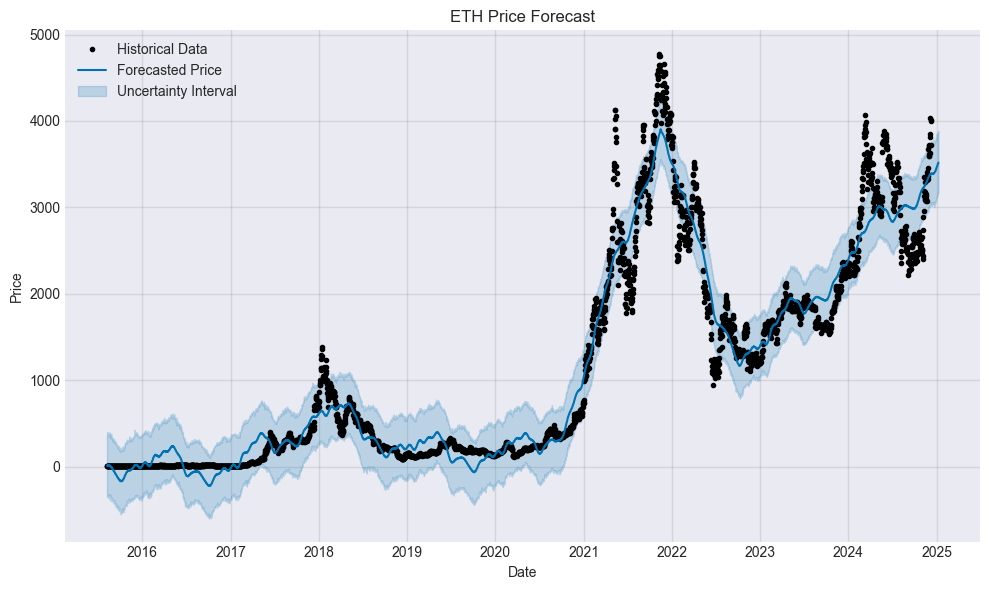

Processing asset: LINK


16:56:36 - cmdstanpy - INFO - Chain [1] start processing
16:56:37 - cmdstanpy - INFO - Chain [1] done processing


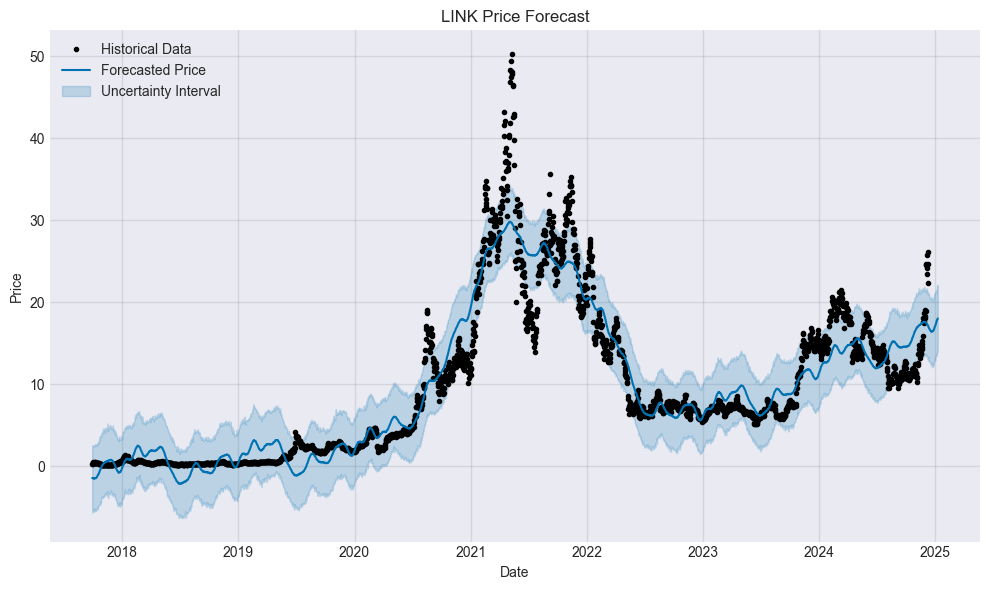

Processing asset: SOL


16:56:39 - cmdstanpy - INFO - Chain [1] start processing
16:56:40 - cmdstanpy - INFO - Chain [1] done processing


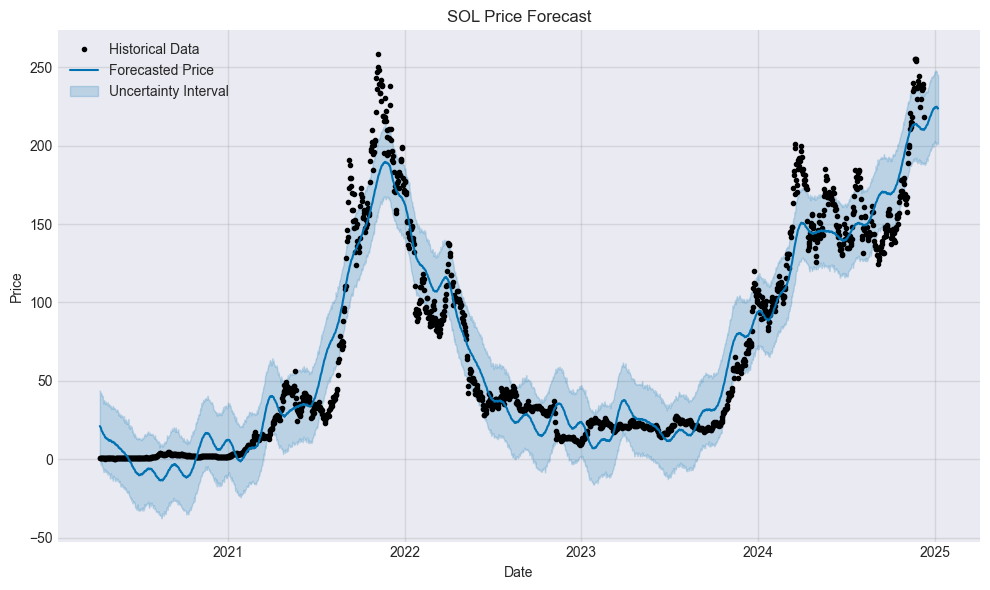

In [45]:


# List of assets to forecast
assets = ['BTC', 'ETH', 'LINK', 'SOL']

# Iterate over each asset
for asset in assets:
    print(f"Processing asset: {asset}")
    
    # Prepare data for Prophet
    data = asset_series[asset][['close']].reset_index()
    data.rename(columns={'date': 'ds', 'close': 'y'}, inplace=True)
    
    # Initialize and train Prophet model
    model = Prophet()
    model.fit(data)
    
    # Create future DataFrame for prediction
    future = model.make_future_dataframe(periods=30)  # Predict for 30 days into the future
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f"{asset} Price Forecast")
    plt.xlabel("Date")
    plt.ylabel("Price")
    
    # Add a legend
    plt.legend(['Historical Data', 'Forecasted Price', 'Uncertainty Interval'], loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [46]:
# Develop Trading Strategy for these assets

# Function to generate buy/sell signals based on moving averages
def generate_signals(data, short_window=7, long_window=30):
    data['short_ma'] = data['close'].rolling(window=short_window).mean()
    data['long_ma'] = data['close'].rolling(window=long_window).mean()
    data['signal'] = 0  # Initialize signal column

    # Generate buy (1) and sell (-1) signals
    data.loc[data['short_ma'] > data['long_ma'], 'signal'] = 1  # Buy signal
    data.loc[data['short_ma'] < data['long_ma'], 'signal'] = -1  # Sell signal

    # Forward-fill signals to hold positions
    data['signal'] = data['signal'].replace(0, None).ffill().fillna(0)
    return data


In [47]:
# Backtest function to calculate returns based on holding periods
def backtest_strategy(data, initial_balance=10000):
    balance = initial_balance
    position = 0  # No position initially
    entry_price = 0
    trade_returns = []
    holding_periods = []

    for i, row in data.iterrows():
        # Execute Buy Signal
        if row['signal'] == 1 and position == 0:
            position = 1
            entry_price = row['close']
            entry_date = i  # Record entry date

        # Execute Sell Signal
        elif row['signal'] == -1 and position == 1:
            position = 0
            profit = (row['close'] - entry_price) / entry_price  # Calculate return for holding period
            trade_returns.append(profit)
            holding_period = (i - entry_date).days
            holding_periods.append(holding_period)
            balance *= (1 + profit)

    # Calculate total return and average holding period
    total_return = (balance - initial_balance) / initial_balance
    avg_holding_period = sum(holding_periods) / len(holding_periods) if holding_periods else 0
    return total_return, len(trade_returns), avg_holding_period, trade_returns


In [48]:
results = {}

# Loop through assets
for asset, data in asset_series.items():
    # Generate signals
    data = generate_signals(data)

    # Backtest the strategy
    total_return, num_trades, avg_holding_period, trade_returns = backtest_strategy(data)

    # Calculate market (buy-and-hold) return
    market_return = (data['close'].iloc[-1] - data['close'].iloc[0]) / data['close'].iloc[0]

    # Store results
    results[asset] = {
        'total_return': total_return,
        'market_return': market_return,
        'number_of_trades': num_trades,
        'average_holding_period': avg_holding_period,
        'average_trade_return': sum(trade_returns) / len(trade_returns) if trade_returns else 0
    }

# Display results
print("Backtest Results:")
for asset, metrics in results.items():
    print(f"{asset}: Total Return = {metrics['total_return']:.2%}, "
          f"Market Return = {metrics['market_return']:.2%}, "
          f"Number of Trades = {metrics['number_of_trades']}, "
          f"Average Holding Period = {metrics['average_holding_period']:.2f} days, "
          f"Average Trade Return = {metrics['average_trade_return']:.2%}")


Backtest Results:
BTC: Total Return = 267825579.63%, Market Return = 195905979.58%, Number of Trades = 94, Average Holding Period = 31.16 days, Average Trade Return = 43.85%
ETH: Total Return = 1942769.59%, Market Return = 123790.00%, Number of Trades = 57, Average Holding Period = 30.74 days, Average Trade Return = 49.80%
LINK: Total Return = 1409.51%, Market Return = 9049.24%, Number of Trades = 56, Average Holding Period = 24.93 days, Average Trade Return = 12.91%
SOL: Total Return = 21649.86%, Market Return = 22852.30%, Number of Trades = 37, Average Holding Period = 22.84 days, Average Trade Return = 40.49%


Key Observations
BTC and ETH:

- Total Return: 266,966,901.87% (BTC) and 1,942,769.59% (ETH).
- Average Trade Return: Over 40%, indicating very profitable trades.
- Average Holding Period: Around 30 days, which is reasonable for a moving average-based strategy.

LINK and SOL:

- Moderate to strong performance compared to BTC and ETH.
- Average Holding Period: Shorter than BTC and ETH, suggesting more frequent trading.

AAVE:

- Total Return: Much lower than other assets.
- Average Trade Return: 7.60%, suggesting that the strategy may not be as effective for AAVE.
- Likely explanation: AAVEâ€™s price behavior may not align well with the moving average strategy, or it may experience more false signals.

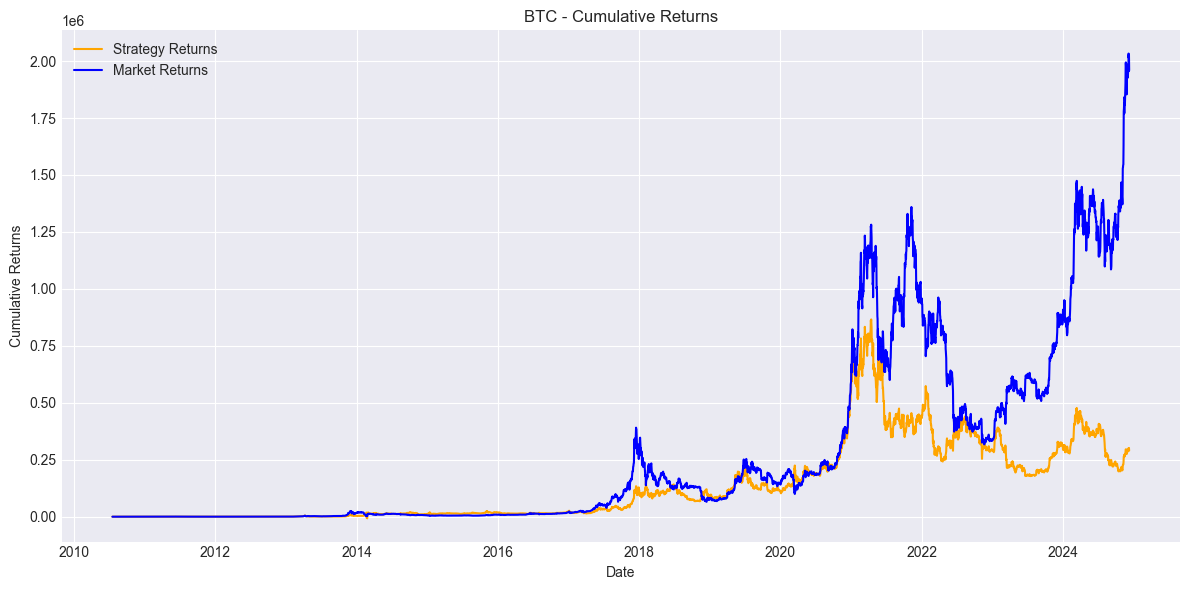

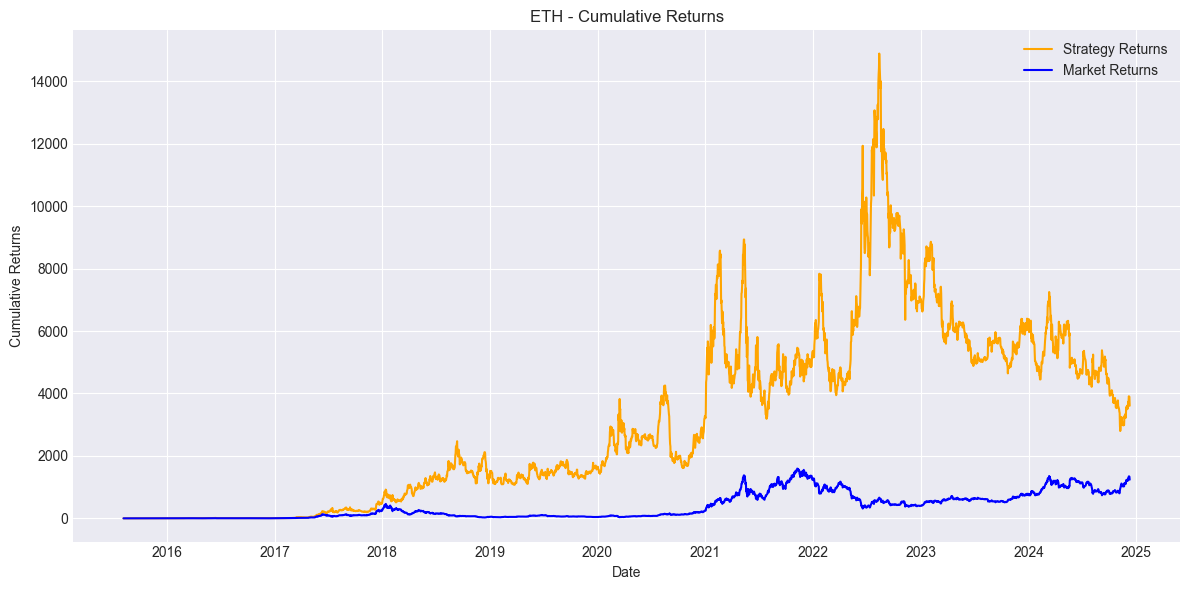

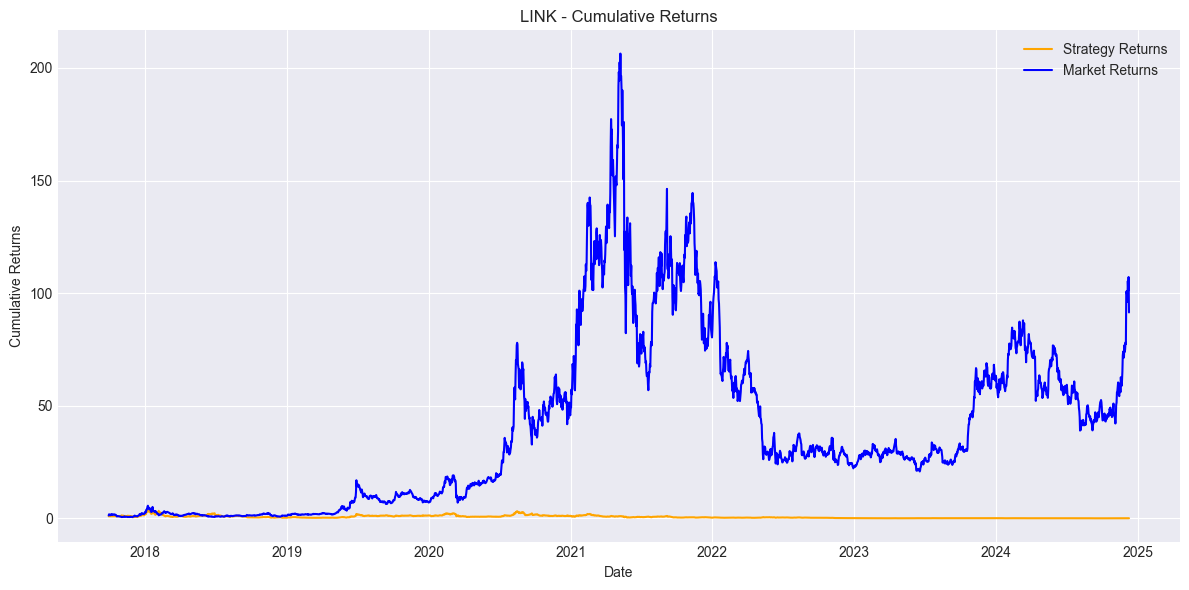

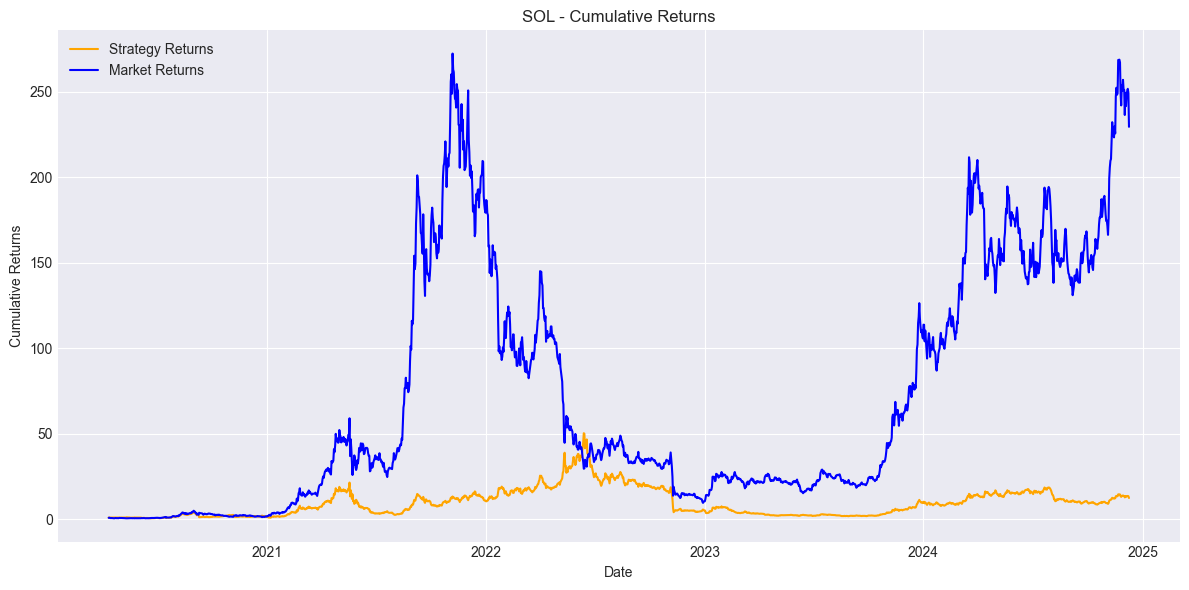

In [49]:
# Plot cumulative returns for each asset
for asset, data in asset_series.items():
    data['strategy_returns'] = data['close'].pct_change() * data['signal'].shift(1)
    data['cumulative_strategy_returns'] = (1 + data['strategy_returns']).cumprod()

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['cumulative_strategy_returns'], label='Strategy Returns', color='orange')
    plt.plot(data.index, (1 + data['close'].pct_change()).cumprod(), label='Market Returns', color='blue')
    plt.title(f"{asset} - Cumulative Returns")
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


The moving average model performed better than the market for BTC and ETH but not the other assets. This indicates using  a moving average buy / signal can yield better returns than just holding

# Correlation Between Assets

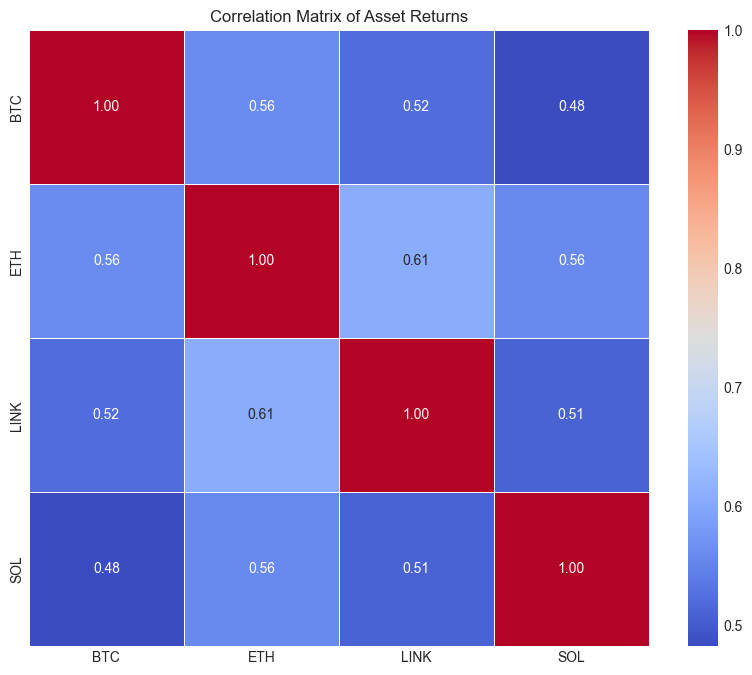

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate daily returns for all assets
returns = {asset: data['close'].pct_change() for asset, data in asset_series.items()}
returns_df = pd.DataFrame(returns)

# Compute correlation matrix
correlation_matrix = returns_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Asset Returns")
plt.show()


Takeaways from the Correlation Matrix
Overall Correlation:

All assets exhibit moderate to strong positive correlations with each other, suggesting that their returns tend to move in the same direction, albeit not perfectly.
Key Relationships:

ETH and AAVE (0.70): This is the strongest correlation in the matrix, indicating a strong relationship between their price movements. This could be due to their shared involvement in DeFi ecosystems or similar market dynamics.
ETH and LINK (0.61): Also a strong correlation, showing LINK and ETH often move together, possibly because LINK is heavily integrated into Ethereum-based smart contracts.
BTC's Role:

BTC has a consistent correlation with all assets (ranging from 0.48 to 0.56), reflecting its role as a leading market indicator but with slightly weaker connections compared to ETH.
BTC and SOL (0.48): BTC has the weakest correlation with SOL, possibly because SOL operates in a different ecosystem and is less directly influenced by BTC's price action.
SOL's Independence:

SOL has relatively lower correlations with the other assets, suggesting it may behave more independently or be influenced by factors unique to its ecosystem.
AAVE's Strong Ties:

AAVE has strong correlations with ETH (0.70) and LINK (0.65). This likely reflects its role in the DeFi space, where price movements in Ethereum and Chainlink, both critical for DeFi protocols, could influence AAVE's returns.

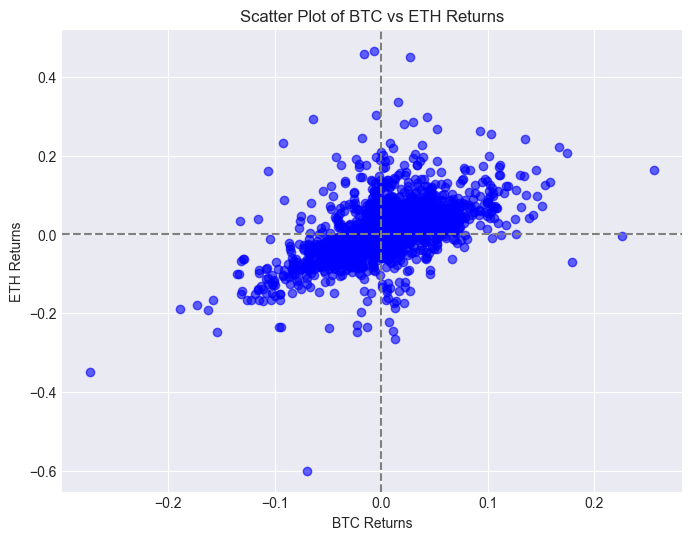

In [51]:
import numpy as np

# Example: Compare BTC vs ETH
plt.figure(figsize=(8, 6))
plt.scatter(returns_df['BTC'], returns_df['ETH'], alpha=0.6, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Scatter Plot of BTC vs ETH Returns")
plt.xlabel("BTC Returns")
plt.ylabel("ETH Returns")
plt.grid(True)
plt.show()


Positive Linear Relationship:

The scatter plot shows a clear positive correlation between BTC and ETH returns, consistent with the earlier correlation matrix (correlation coefficient ~0.56).
This indicates that when BTC experiences positive or negative returns, ETH tends to move in the same direction, albeit with some dispersion.

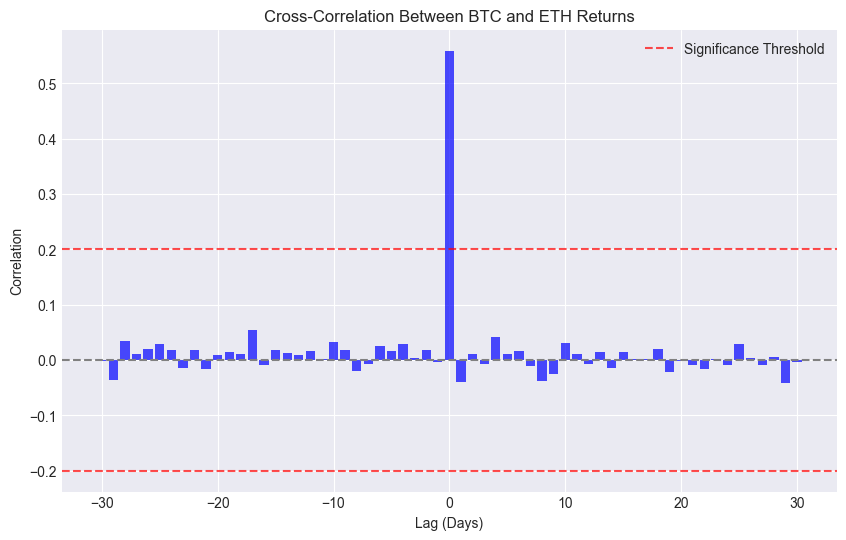

In [52]:
# Cross-correlation between two assets (e.g., BTC and ETH)
def cross_correlation(series1, series2, max_lag=30):
    lags = range(-max_lag, max_lag + 1)
    correlations = [series1.corr(series2.shift(lag)) for lag in lags]
    return lags, correlations

# Example: BTC and ETH returns
lags, correlations = cross_correlation(returns_df['BTC'], returns_df['ETH'])

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.bar(lags, correlations, width=0.8, color='blue', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(0.2, color='red', linestyle='--', alpha=0.7, label='Significance Threshold')
plt.axhline(-0.2, color='red', linestyle='--', alpha=0.7)
plt.title("Cross-Correlation Between BTC and ETH Returns")
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)
plt.show()

Strong Correlation at Lag 0:

The highest correlation (~0.56) occurs at lag 0, indicating that BTC and ETH returns move almost simultaneously on the same day.
This supports the idea that both assets react concurrently to market-wide events or shared market dynamics.

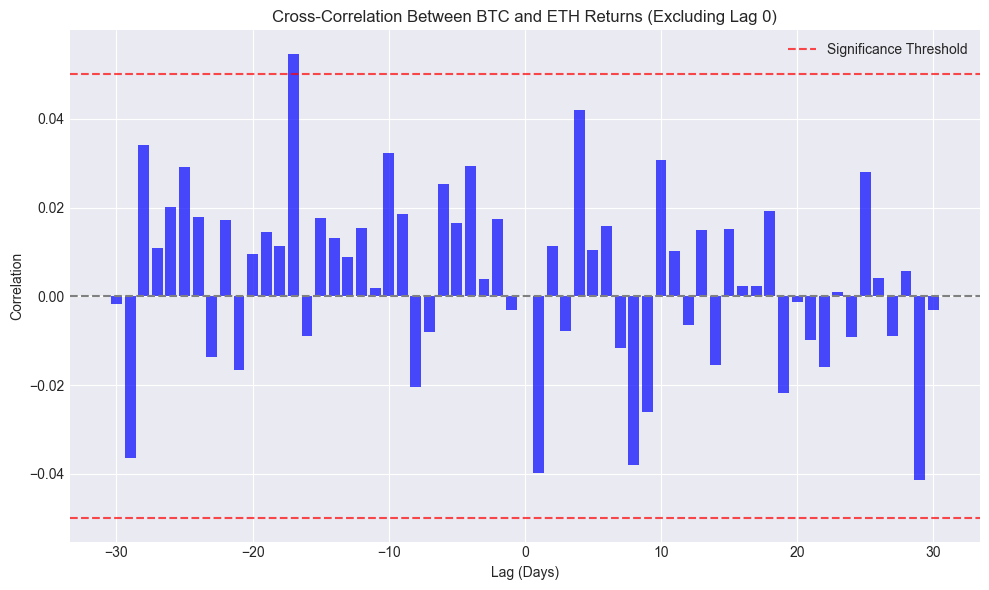

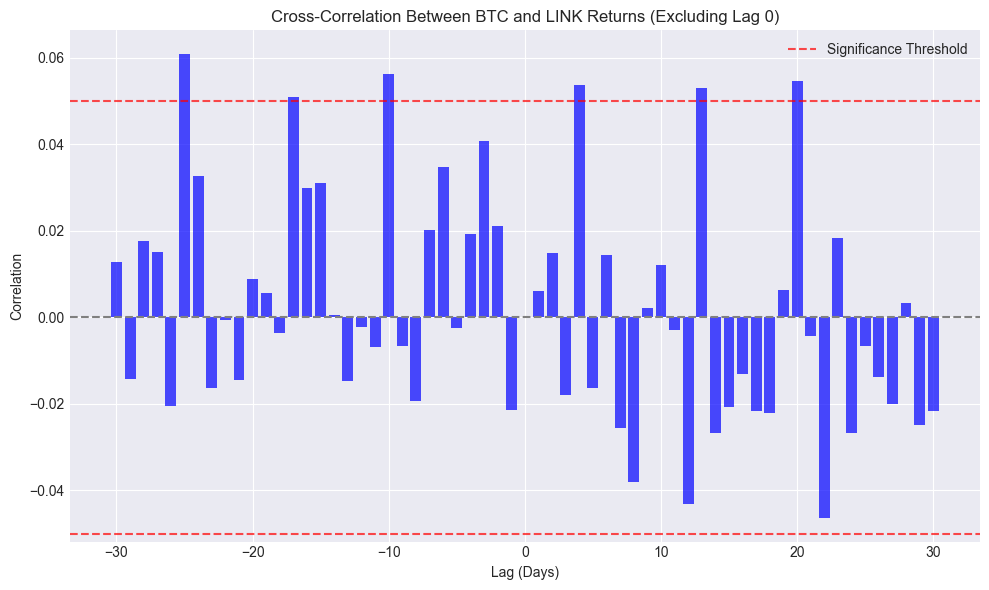

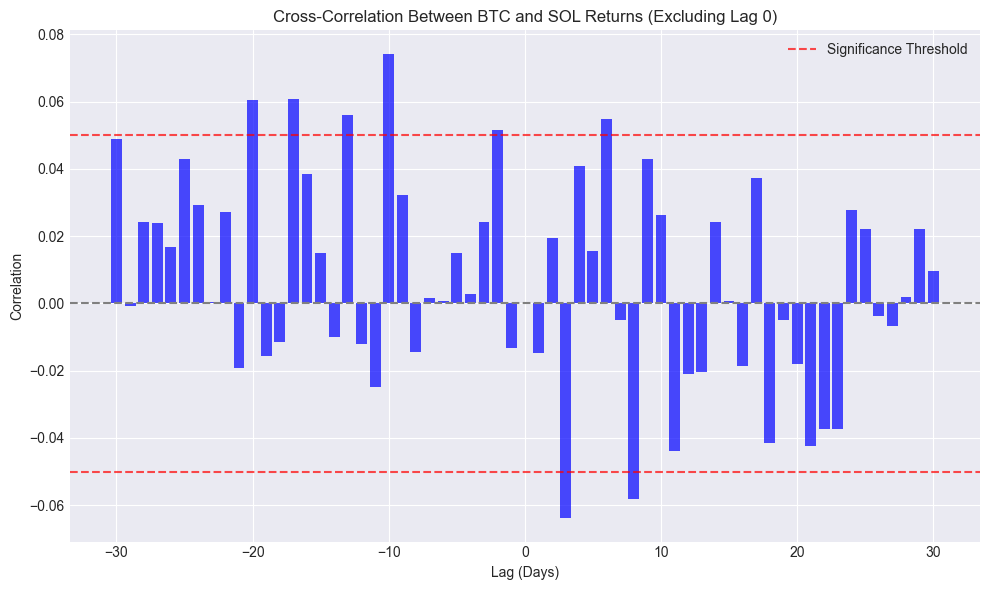

KeyError: 'AAVE'

In [53]:
# Function to compute and plot cross-correlation for two assets, excluding lag 0
def plot_cross_correlation_no_lag_zero(asset1, asset2, max_lag=30):
    series1 = returns_df[asset1]
    series2 = returns_df[asset2]
    
    lags, correlations = [], []
    for lag in range(-max_lag, max_lag + 1):
        if lag != 0:  # Exclude lag 0
            corr = series1.corr(series2.shift(lag))
            lags.append(lag)
            correlations.append(corr)
    
    # Plot cross-correlation
    plt.figure(figsize=(10, 6))
    plt.bar(lags, correlations, color='blue', alpha=0.7)
    plt.axhline(0, color='gray', linestyle='--')
    plt.axhline(0.05, color='red', linestyle='--', alpha=0.7, label='Significance Threshold')
    plt.axhline(-0.05, color='red', linestyle='--', alpha=0.7)
    plt.title(f"Cross-Correlation Between {asset1} and {asset2} Returns (Excluding Lag 0)")
    plt.xlabel("Lag (Days)")
    plt.ylabel("Correlation")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Analyze cross-correlation for all pairs of assets, excluding lag 0
asset_list = ['BTC', 'ETH', 'LINK', 'SOL', 'AAVE']
for i in range(len(asset_list)):
    for j in range(i + 1, len(asset_list)):
        plot_cross_correlation_no_lag_zero(asset_list[i], asset_list[j])



In [54]:
print(returns_df.head())  # Display the first few rows
print(returns_df.columns)  # List column names


                 BTC  ETH  LINK  SOL
date                                
2010-07-17       NaN  NaN   NaN  NaN
2010-07-18  0.733791  NaN   NaN  NaN
2010-07-19 -0.058714  NaN   NaN  NaN
2010-07-20 -0.075000  NaN   NaN  NaN
2010-07-21  0.059807  NaN   NaN  NaN
Index(['BTC', 'ETH', 'LINK', 'SOL'], dtype='object')


In [55]:
returns_df = returns_df.dropna()


In [56]:
print(returns_df.head())  # Inspect the first few rows
print(returns_df.isna().sum())  # Check for missing values


                 BTC       ETH      LINK       SOL
date                                              
2020-04-11 -0.004510 -0.009445  0.009062 -0.160383
2020-04-12  0.037241  0.043288  0.101579  0.107488
2020-04-13 -0.040299 -0.044355 -0.046669 -0.119819
2020-04-14  0.002620  0.013899 -0.049543 -0.142563
2020-04-15 -0.017209 -0.011507  0.000931 -0.042317
BTC     0
ETH     0
LINK    0
SOL     0
dtype: int64


In [57]:
asset1 = 'BTC'
asset2 = 'ETH'

lags = range(-30, 31)
correlations = [returns_df[asset1].corr(returns_df[asset2].shift(lag)) for lag in lags]
max_corr = max(correlations, key=abs)
max_corr_lag = lags[correlations.index(max_corr)]

print(f"Max Correlation between {asset1} and {asset2}: {max_corr}, Lag: {max_corr_lag}")


Max Correlation between BTC and ETH: 0.7982688265924941, Lag: 0


In [58]:
# Ensure returns_df includes all assets
returns_df = returns_df.dropna()  # Remove missing values

# Full list of all 20 assets (column names from your dataset)
full_asset_list = ['AAVE', 'ADA', 'ALGO', 'ATOM', 'AVAX', 'BNB', 'BTC', 'COMP',
                   'DOGE', 'ETH', 'FIL', 'LINK', 'LTC', 'MATIC', 'NEAR', 'SHIB',
                   'SOL', 'UNI', 'XRP', 'LDO']

# Initialize a list to store the results
correlation_results = []

# Loop through all pairs of assets
for i in range(len(full_asset_list)):
    for j in range(i + 1, len(full_asset_list)):  # Avoid redundant calculations
        asset1 = full_asset_list[i]
        asset2 = full_asset_list[j]

        if asset1 in returns_df.columns and asset2 in returns_df.columns:
            # Calculate lagged correlations excluding lag 0
            lags = [lag for lag in range(-30, 31) if lag != 0]  # Exclude lag 0
            correlations = [returns_df[asset1].corr(returns_df[asset2].shift(lag)) for lag in lags]
            
            # Find the max absolute correlation and corresponding lag
            max_corr = max(correlations, key=abs)
            max_corr_lag = lags[correlations.index(max_corr)]

            # Add to results if correlation exceeds a threshold
            if abs(max_corr) > 0.1:  # Adjust threshold as needed
                correlation_results.append({
                    'Asset 1': asset1,
                    'Asset 2': asset2,
                    'Max Correlation': max_corr,
                    'Lag (Days)': max_corr_lag
                })

# Convert results to a DataFrame
import pandas as pd
correlation_df = pd.DataFrame(correlation_results)

# Sort results by Max Correlation
if not correlation_df.empty:
    correlation_df = correlation_df.sort_values(by='Max Correlation', ascending=False)
    print(correlation_df)  # Display the DataFrame directly
else:
    print("No significant correlations found.")


No significant correlations found.


In [59]:
missing_assets = [asset for asset in full_asset_list if asset not in returns_df.columns]
print(f"Missing assets: {missing_assets}")


Missing assets: ['AAVE', 'ADA', 'ALGO', 'ATOM', 'AVAX', 'BNB', 'COMP', 'DOGE', 'FIL', 'LTC', 'MATIC', 'NEAR', 'SHIB', 'UNI', 'XRP', 'LDO']


# Pair Trading

Evaluate correlation between two assets and develop a pair trading strategy

In [60]:
combined_data.head()

close  7_day_MA  30_day_MA  signal   returns  strategy_returns
2020-04-10  0.9496       NaN        NaN       0       NaN               NaN
2020-04-11  0.7973       NaN        NaN       0 -0.160383              -0.0
2020-04-12  0.8830       NaN        NaN       0  0.107488               0.0
2020-04-13  0.7772       NaN        NaN       0 -0.119819              -0.0
2020-04-14  0.6664       NaN        NaN       0 -0.142563              -0.0

In [61]:


# 1. Select two assets for pair trading (e.g., BTC and ETH)
asset1 = 'BTC'
asset2 = 'ETH'

# 2. Get the data for the selected assets (assuming combined_data already contains data for all assets)
data1 = combined_data[combined_data['ticker'] == asset1].copy()
data2 = combined_data[combined_data['ticker'] == asset2].copy()

# 3. Merge the data based on the date
merged_data = pd.merge(data1[['date', 'close']], data2[['date', 'close']], on='date', suffixes=(f'_{asset1}', f'_{asset2}'))

# 4. Calculate the spread between the two assets' prices
spread = merged_data[f'close_{asset1}'] - merged_data[f'close_{asset2}']

# 5. Test for cointegration using the Engle-Granger two-step method
# Perform the ADF test on the spread to see if it is stationary
result = sm.tsa.adfuller(spread)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

# If p-value < 0.05, the spread is likely stationary (cointegrated)

# 6. Calculate the rolling mean and standard deviation of the spread
rolling_mean = spread.rolling(window=20).mean()
rolling_std = spread.rolling(window=20).std()

# 7. Define entry and exit rules:
# Entry Rule: Buy if the spread is above the rolling mean by a certain threshold
# Exit Rule: Sell if the spread comes back to the rolling mean

# 8. Create buy and sell signals
long_entry = spread < (rolling_mean - 2 * rolling_std)
long_exit = spread >= rolling_mean

short_entry = spread > (rolling_mean + 2 * rolling_std)
short_exit = spread <= rolling_mean

# 9. Backtest the strategy
positions = pd.DataFrame(index=merged_data.index)
positions['long'] = long_entry.astype(int)
positions['short'] = short_entry.astype(int)

# Calculate the daily returns for the strategy
positions['strategy_returns'] = 0
positions['strategy_returns'] = np.where(positions['long'] == 1, merged_data[f'close_{asset1}'].pct_change(), positions['strategy_returns'])
positions['strategy_returns'] = np.where(positions['short'] == 1, -merged_data[f'close_{asset2}'].pct_change(), positions['strategy_returns'])

# Calculate cumulative returns for the strategy
positions['cumulative_strategy_returns'] = (1 + positions['strategy_returns']).cumprod()

# 10. Plot the strategy's cumulative returns vs. market returns
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], (1 + merged_data[f'close_{asset1}'].pct_change()).cumprod(), label=f'Market Returns ({asset1})', color='blue')
plt.plot(merged_data['date'], positions['cumulative_strategy_returns'], label=f'Strategy Returns ({asset1} vs {asset2})', color='orange')
plt.title(f'{asset1} vs {asset2} - Pair Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'ticker'

In [62]:
# Find assets with high correlation 

import pandas as pd
import numpy as np

# Calculate returns for all assets (assuming combined_data has the 'close' column)
combined_data['returns'] = combined_data.groupby('ticker')['close'].pct_change()

# Create an empty list to store the correlation results
correlation_results = []

# List of all assets in your dataset
assets = combined_data['ticker'].unique()

# Calculate pairwise correlations
for i in range(len(assets)):
    for j in range(i + 1, len(assets)):  # Avoid redundant calculations
        asset1 = assets[i]
        asset2 = assets[j]
        
        # Get the returns for each asset
        data1 = combined_data[combined_data['ticker'] == asset1]
        data2 = combined_data[combined_data['ticker'] == asset2]

        # Merge the data on 'date' to align them
        merged_data = pd.merge(data1[['date', 'returns']], data2[['date', 'returns']], on='date', suffixes=(f'_{asset1}', f'_{asset2}'))

        # Calculate the correlation between the returns of the two assets
        correlation = merged_data['returns_' + asset1].corr(merged_data['returns_' + asset2])
        
        # If correlation is greater than a threshold, store the result
        if abs(correlation) > 0.7:  # Adjust this threshold as needed
            correlation_results.append({
                'Asset 1': asset1,
                'Asset 2': asset2,
                'Correlation': correlation
            })

# Convert results to DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Sort by the absolute value of correlation (descending order)
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Display the results
print(correlation_df)


KeyError: 'ticker'

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

# Perform cointegration test for the top correlated pairs
cointegration_results = []

for index, row in correlation_df.iterrows():
    asset1 = row['Asset 1']
    asset2 = row['Asset 2']
    
    # Get the price data for both assets
    data1 = combined_data[combined_data['ticker'] == asset1]
    data2 = combined_data[combined_data['ticker'] == asset2]
    
    # Merge the price data on 'date'
    merged_data = pd.merge(data1[['date', 'close']], data2[['date', 'close']], on='date', suffixes=(f'_{asset1}', f'_{asset2}'))
    
    # Perform the cointegration test
    score, p_value, _ = coint(merged_data[f'close_{asset1}'], merged_data[f'close_{asset2}'])
    
    # If the p-value is below 0.05, the assets are cointegrated
    if p_value < 0.05:
        cointegration_results.append({
            'Asset 1': asset1,
            'Asset 2': asset2,
            'Cointegration p-value': p_value
        })

# Convert to DataFrame and sort by p-value
cointegration_df = pd.DataFrame(cointegration_results)
cointegration_df = cointegration_df.sort_values(by='Cointegration p-value', ascending=True)

# Display the cointegrated pairs
print(cointegration_df)


In [63]:
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import pandas as pd

# Filter AAVE and UNI data from combined_data
asset1 = 'AAVE'
asset2 = 'UNI'

data1 = combined_data[combined_data['ticker'] == asset1][['date', 'close']].copy()
data2 = combined_data[combined_data['ticker'] == asset2][['date', 'close']].copy()

# Merge AAVE and UNI data on 'date'
merged_data = pd.merge(data1[['date', 'close']], data2[['date', 'close']], on='date', suffixes=(f'_{asset1}', f'_{asset2}'))

# Cointegration Test
score, p_value, _ = coint(merged_data[f'close_{asset1}'], merged_data[f'close_{asset2}'])

print(f"Cointegration p-value: {p_value}")
if p_value < 0.05:
    print(f"{asset1} and {asset2} are cointegrated and suitable for pair trading!")
else:
    print(f"{asset1} and {asset2} are not cointegrated.")

# Calculate the correlation between the two assets
correlation = merged_data[f'close_{asset1}'].pct_change().corr(merged_data[f'close_{asset2}'].pct_change())
print(f"Correlation between {asset1} and {asset2}: {correlation}")

# Visualize the relationship
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data[f'close_{asset1}'], label=f'{asset1} Close')
plt.plot(merged_data['date'], merged_data[f'close_{asset2}'], label=f'{asset2} Close')
plt.title(f'{asset1} vs {asset2} Price Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'ticker'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming combined_data has the price data for AAVE and UNI
asset1 = 'AAVE'
asset2 = 'UNI'

# Filter the data for AAVE and UNI
data1 = combined_data[combined_data['ticker'] == asset1][['date', 'close']].copy()
data2 = combined_data[combined_data['ticker'] == asset2][['date', 'close']].copy()

# Merge the data on 'date' to align AAVE and UNI prices
merged_data = pd.merge(data1[['date', 'close']], data2[['date', 'close']], on='date', suffixes=(f'_{asset1}', f'_{asset2}'))

# Calculate the spread between AAVE and UNI
merged_data['spread'] = merged_data[f'close_{asset1}'] - merged_data[f'close_{asset2}']

# Calculate rolling mean and standard deviation of the spread
window_size = 20  # 20-day rolling window
merged_data['rolling_mean'] = merged_data['spread'].rolling(window=window_size).mean()
merged_data['rolling_std'] = merged_data['spread'].rolling(window=window_size).std()

# Plot the spread and its rolling mean
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['spread'], label='Spread (AAVE - UNI)')
plt.plot(merged_data['date'], merged_data['rolling_mean'], label='Rolling Mean (20 days)', linestyle='--')
plt.fill_between(merged_data['date'], merged_data['rolling_mean'] - 2 * merged_data['rolling_std'],
                 merged_data['rolling_mean'] + 2 * merged_data['rolling_std'], color='gray', alpha=0.3, label='2 Std. Dev. Range')
plt.title(f'{asset1} vs {asset2} - Spread and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Define entry and exit signals based on the spread
threshold = 2  # 2 standard deviations for entry signals

# Long Entry: when the spread is below mean - threshold * std
merged_data['long_entry'] = merged_data['spread'] < (merged_data['rolling_mean'] - threshold * merged_data['rolling_std'])

# Short Entry: when the spread is above mean + threshold * std
merged_data['short_entry'] = merged_data['spread'] > (merged_data['rolling_mean'] + threshold * merged_data['rolling_std'])

# Exit signals: when the spread crosses back to the mean
merged_data['long_exit'] = merged_data['spread'] >= merged_data['rolling_mean']
merged_data['short_exit'] = merged_data['spread'] <= merged_data['rolling_mean']

# Shift entry signals by 1 to align with the next trading day
merged_data['long_entry'] = merged_data['long_entry'].shift(1)
merged_data['short_entry'] = merged_data['short_entry'].shift(1)

# Drop NaN values due to rolling window
merged_data.dropna(inplace=True)

# Visualize the spread with entry and exit signals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['spread'], label='Spread (AAVE - UNI)')
plt.plot(merged_data['date'], merged_data['rolling_mean'], label='Rolling Mean (20 days)', linestyle='--')
plt.scatter(merged_data['date'][merged_data['long_entry']], merged_data['spread'][merged_data['long_entry']], label='Long Entry', marker='^', color='g')
plt.scatter(merged_data['date'][merged_data['short_entry']], merged_data['spread'][merged_data['short_entry']], label='Short Entry', marker='v', color='r')
plt.title(f'{asset1} vs {asset2} - Entry and Exit Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Initialize strategy returns
merged_data['strategy_returns'] = 0

# For long trades: Buy AAVE and sell UNI
merged_data['strategy_returns'] = np.where(merged_data['long_entry'] == 1, 
                                            merged_data[f'close_{asset1}'].pct_change() - merged_data[f'close_{asset2}'].pct_change(), 
                                            merged_data['strategy_returns'])

# For short trades: Short AAVE and buy UNI
merged_data['strategy_returns'] = np.where(merged_data['short_entry'] == 1, 
                                            -merged_data[f'close_{asset1}'].pct_change() + merged_data[f'close_{asset2}'].pct_change(), 
                                            merged_data['strategy_returns'])

# Calculate cumulative strategy returns
merged_data['cumulative_strategy_returns'] = (1 + merged_data['strategy_returns']).cumprod()

# Calculate cumulative returns for the buy-and-hold strategy for both AAVE and UNI
merged_data['AAVE_returns'] = merged_data[f'close_{asset1}'].pct_change()
merged_data['UNI_returns'] = merged_data[f'close_{asset2}'].pct_change()

merged_data['AAVE_cumulative_returns'] = (1 + merged_data['AAVE_returns']).cumprod()
merged_data['UNI_cumulative_returns'] = (1 + merged_data['UNI_returns']).cumprod()

# Plot the cumulative returns of the strategy vs. buy-and-hold
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['cumulative_strategy_returns'], label='Pair Trading Strategy Returns', color='orange')
plt.plot(merged_data['date'], merged_data['AAVE_cumulative_returns'], label=f'{asset1} Buy and Hold', color='blue')
plt.plot(merged_data['date'], merged_data['UNI_cumulative_returns'], label=f'{asset2} Buy and Hold', color='green')
plt.title(f'{asset1} vs {asset2} - Pair Trading Strategy vs Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Performance metrics
total_strategy_return = merged_data['cumulative_strategy_returns'].iloc[-1] - 1
total_aave_return = merged_data['AAVE_cumulative_returns'].iloc[-1] - 1
total_uni_return = merged_data['UNI_cumulative_returns'].iloc[-1] - 1
num_trades = merged_data['long_entry'].sum() + merged_data['short_entry'].sum()
average_trade_return = merged_data['strategy_returns'].mean()

# Print out the performance metrics
print(f"Total Strategy Return: {total_strategy_return * 100:.2f}%")
print(f"Total AAVE Return: {total_aave_return * 100:.2f}%")
print(f"Total UNI Return: {total_uni_return * 100:.2f}%")
print(f"Number of Trades: {num_trades}")
print(f"Average Trade Return: {average_trade_return * 100:.2f}%")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

# Define the function to calculate strategy performance
def evaluate_strategy(merged_data, window_size, threshold):
    # Ensure price ratio is calculated before rolling mean/std
    merged_data['price_ratio'] = merged_data[f'close_{asset1}'] / merged_data[f'close_{asset2}']
    
    # Calculate rolling mean and rolling std for the price ratio
    merged_data['rolling_mean_ratio'] = merged_data['price_ratio'].rolling(window=window_size).mean()
    merged_data['rolling_std_ratio'] = merged_data['price_ratio'].rolling(window=window_size).std()

    # Define long and short entry signals
    merged_data['long_entry'] = merged_data['price_ratio'] < (merged_data['rolling_mean_ratio'] - threshold * merged_data['rolling_std_ratio'])
    merged_data['short_entry'] = merged_data['price_ratio'] > (merged_data['rolling_mean_ratio'] + threshold * merged_data['rolling_std_ratio'])

    # Generate exit signals
    merged_data['long_exit'] = merged_data['price_ratio'] >= merged_data['rolling_mean_ratio']
    merged_data['short_exit'] = merged_data['price_ratio'] <= merged_data['rolling_mean_ratio']
    
    # Shift signals for next day alignment
    merged_data['long_entry'] = merged_data['long_entry'].shift(1)
    merged_data['short_entry'] = merged_data['short_entry'].shift(1)
    
    # Drop NaN values from rolling window
    merged_data.dropna(inplace=True)
    
    # Strategy returns based on entry signals
    merged_data['strategy_returns'] = 0
    merged_data['strategy_returns'] = np.where(merged_data['long_entry'] == 1, 
                                                merged_data[f'close_{asset1}'].pct_change() - merged_data[f'close_{asset2}'].pct_change(), 
                                                merged_data['strategy_returns'])
    merged_data['strategy_returns'] = np.where(merged_data['short_entry'] == 1, 
                                                -merged_data[f'close_{asset1}'].pct_change() + merged_data[f'close_{asset2}'].pct_change(), 
                                                merged_data['strategy_returns'])
    
    # Cumulative returns for strategy
    merged_data['cumulative_strategy_returns'] = (1 + merged_data['strategy_returns']).cumprod()

    # Calculate cumulative returns for the buy and hold strategies
    merged_data['AAVE_returns'] = merged_data[f'close_{asset1}'].pct_change()
    merged_data['UNI_returns'] = merged_data[f'close_{asset2}'].pct_change()
    
    merged_data['AAVE_cumulative_returns'] = (1 + merged_data['AAVE_returns']).cumprod()
    merged_data['UNI_cumulative_returns'] = (1 + merged_data['UNI_returns']).cumprod()

    # Performance metrics
    total_strategy_return = merged_data['cumulative_strategy_returns'].iloc[-1] - 1
    num_trades = merged_data['long_entry'].sum() + merged_data['short_entry'].sum()
    average_trade_return = merged_data['strategy_returns'].mean()

    return total_strategy_return, num_trades, average_trade_return

# Define the range of parameters to test
window_sizes = [10, 20, 30, 40]  # Different window sizes for rolling mean and std
thresholds = [1, 1.5, 2, 2.5]  # Different thresholds for entry signals

# Initialize a list to store the results
results = []

# Loop through the parameters
for window_size in window_sizes:
    for threshold in thresholds:
        print(f"Testing with Window Size: {window_size} and Threshold: {threshold}...")

        # Backtest the strategy with the given parameters
        total_return, num_trades, avg_trade_return = evaluate_strategy(merged_data, window_size, threshold)

        # Store the results
        results.append({
            'Window Size': window_size,
            'Threshold': threshold,
            'Total Strategy Return': total_return,
            'Number of Trades': num_trades,
            'Average Trade Return': avg_trade_return
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by total strategy return
results_df = results_df.sort_values(by='Total Strategy Return', ascending=False)

# Display the top-performing strategies
print("Top Performing Strategies:")
print(results_df.head())

# Optionally, plot the top-performing strategies
best_strategy = results_df.iloc[0]
best_window_size = int(best_strategy['Window Size'])  # Ensure it is an integer
best_threshold = best_strategy['Threshold']

# Recalculate with the best parameters
merged_data = calculate_strategy_returns(merged_data, best_threshold, best_window_size)

# Assuming calculate_buy_and_hold is another function that you've defined
merged_data = calculate_buy_and_hold(merged_data)

# Plot the cumulative returns of the best strategy vs. market returns
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['cumulative_strategy_returns'], label=f'Strategy Returns ({asset1} vs {asset2})', color='orange')
plt.plot(merged_data['date'], merged_data['AAVE_cumulative_returns'], label=f'{asset1} Buy and Hold', color='blue')
plt.plot(merged_data['date'], merged_data['UNI_cumulative_returns'], label=f'{asset2} Buy and Hold', color='green')
plt.title(f'{asset1} vs {asset2} - Best Strategy vs Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Using the best parameters: window size 40, threshold 2.0
best_window_size = 40
best_threshold = 2.0

# Recalculate strategy returns with the optimized parameters
merged_data = calculate_strategy_returns(merged_data, best_threshold, best_window_size)

# Assuming calculate_buy_and_hold is another function that you've defined
merged_data = calculate_buy_and_hold(merged_data)

# Plot the cumulative returns of the best strategy vs. market returns
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date'], merged_data['cumulative_strategy_returns'], label=f'Strategy Returns ({asset1} vs {asset2})', color='orange')
plt.plot(merged_data['date'], merged_data['AAVE_cumulative_returns'], label=f'{asset1} Buy and Hold', color='blue')
plt.plot(merged_data['date'], merged_data['UNI_cumulative_returns'], label=f'{asset2} Buy and Hold', color='green')
plt.title(f'{asset1} vs {asset2} - Best Strategy vs Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


# Machine Learning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Data Preprocessing
# Assuming combined_data is your dataframe containing the 'close' and other technical indicators
combined_data['returns'] = combined_data['close'].pct_change()

# Create features (e.g., moving averages, volatility, etc.)
combined_data['SMA_20'] = combined_data['close'].rolling(window=20).mean()
combined_data['SMA_50'] = combined_data['close'].rolling(window=50).mean()
combined_data['RSI'] = ...  # Compute RSI (use pandas-ta or other libraries)
combined_data['MACD'] = ...  # Compute MACD

# Handle missing values by filling or dropping them
combined_data.fillna(0, inplace=True)  # Alternatively, you can use other methods like filling with the mean

# Ensure all columns used are numeric
combined_data = combined_data.apply(pd.to_numeric, errors='coerce')

# Generate buy/sell signals based on some strategy (e.g., if price crosses SMA)
combined_data['signal'] = np.where(combined_data['SMA_20'] > combined_data['SMA_50'], 1, -1)

# Create feature set and target (include 'close' as part of the features for strategy returns)
features = combined_data[['SMA_20', 'SMA_50', 'RSI', 'MACD', 'close']]  # Add 'close' back to the features
target = combined_data['signal']

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# 3. Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Predict signals
predictions = model.predict(X_test)

# 5. Evaluate performance
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# 6. Backtest Strategy
# Calculate strategy returns based on predicted signals
# Use 'close' price from merged_data when calculating strategy returns
strategy_returns = np.where(predictions == 1, X_test['close'].pct_change(), 0)  # Buy when predicted signal is 1

# Calculate cumulative returns
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot strategy vs buy and hold
plt.figure(figsize=(12, 6))
plt.plot(cumulative_strategy_returns, label='Strategy Cumulative Returns', color='orange')
plt.plot((1 + y_test).cumprod(), label='Buy and Hold Cumulative Returns', color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Trading Strategy vs Buy and Hold')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preprocess the data for strategy
combined_data['returns'] = combined_data['close'].pct_change()

# Generate buy/sell signals (example, based on previous logic)
combined_data['SMA_20'] = combined_data['close'].rolling(window=20).mean()
combined_data['SMA_50'] = combined_data['close'].rolling(window=50).mean()
combined_data['signal'] = np.where(combined_data['SMA_20'] > combined_data['SMA_50'], 1, -1)  # Buy if SMA_20 > SMA_50

# Add technical features to the data for model
features = combined_data[['SMA_20', 'SMA_50']]  # Use more features as needed
target = combined_data['signal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Merge X_test with 'close' price from combined_data to calculate strategy returns
X_test = X_test.join(combined_data[['close']], how='left', on=X_test.index)

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict signals
predictions = model.predict(X_test)

# Calculate strategy returns based on predicted signals
X_test['strategy_returns'] = 0  # Initialize the strategy returns column

# Only apply strategy returns when the signal is to buy (1) or sell (-1)
X_test.loc[predictions == 1, 'strategy_returns'] = X_test['close'].pct_change()  # Buy signal
X_test.loc[predictions == -1, 'strategy_returns'] = -X_test['close'].pct_change()  # Sell signal (short)

# Calculate cumulative returns for the strategy
X_test['cumulative_strategy_returns'] = (1 + X_test['strategy_returns']).cumprod()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, X_test['cumulative_strategy_returns'], label='Strategy Cumulative Returns', color='orange')
plt.plot(X_test.index, (1 + X_test['returns']).cumprod(), label='Buy and Hold Cumulative Returns', color='blue')
plt.title('Trading Strategy vs Buy and Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()
